<a href="https://colab.research.google.com/github/Juanpa06/J_Jimenez-A_Hernandez-IA/blob/main/TareaProgramada3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tarea Programada 3. Redes neuronales convolucionales**

**Tarea Programada 3. Redes neuronales convolucionales**

*   Juan Pablo Jiménez Anderson
*   Adriana Vanessa Hernández Calderón



Importación de librerías necesarias para la red

In [393]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from keras.models import Sequential, Model
from numpy import ndarray
from numpy import append


from tensorflow.keras import backend as k
from keras.models import Model



###**Manejo de los datos**

Se instala e importa librería idx2numpy para manejo de los datos de archivo idx

In [394]:
!pip3 install -q idx2numpy

In [395]:
import idx2numpy                                                                # IDX a ndarray de numpy

Se importan las libreías que nos ayudaran a extraer los datos de Google Dirve, y además se cargan los credenciales de acceso

In [396]:
!pip install PyDrive                                                            #Librería de manejo de datos en drive 

In [397]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

A continuación, se extraen los datos de Google Drive, tanto los sets de letras como de dígitos de EMNIST

**LETRAS**

In [398]:
# Train Images
downloaded = drive.CreateFile({'id':"12zGKYnbNO1HAepTl4dI7Lj5Pkgf7ZeFO"})       # Extrae los datos de drive
downloaded.GetContentFile('train_images')                                       # Guarda los datos en content
# Train Labels
downloaded = drive.CreateFile({'id':"1thGnXAG786bp4HRLoIrIvczEbt94Ryki"})       # Extrae los datos de drive
downloaded.GetContentFile('train_labels')                                       # Guarda los datos en content
# Test Images
downloaded = drive.CreateFile({'id':"1AU81uHPrJpkjynRAhiWCGoSCQwOhQ1DV"})       # Extrae los datos de drive
downloaded.GetContentFile('test_images')                                        # Guarda los datos en content
# Test Labels
downloaded = drive.CreateFile({'id':"1mXmxEJx6FCE17S8o8NaZNTpnUN4WrUY0"})       # Extrae los datos de drive
downloaded.GetContentFile('test_labels')                                        # Guarda los datos en content

**DÍGITOS**

In [399]:
# Train Images
downloaded = drive.CreateFile({'id':"15E8oiZWv3q8Qs6CipAIzbuBQSSOYoae6"})       # Extrae los datos de drive
downloaded.GetContentFile('train_images_n')                                     # Guarda los datos en content
# Train Labels
downloaded = drive.CreateFile({'id':"1nIG3c6TdN2avgUkwJYvElz_EcUAaahk_"})       # Extrae los datos de drive
downloaded.GetContentFile('train_labels_n')                                     # Guarda los datos en content
# Test Images
downloaded = drive.CreateFile({'id':"1CQP9yyD-j2hcbeW5EAPGL6StEp6uNmRQ"})       # Extrae los datos de drive
downloaded.GetContentFile('test_images_n')                                      # Guarda los datos en content
# Test Labels
downloaded = drive.CreateFile({'id':"1PEIcOwXVPw1SVnyduMrkMhEU6U9x5tZH"})       # Extrae los datos de drive
downloaded.GetContentFile('test_labels_n')                                      # Guarda los datos en content

**Manejo de los datos:** Se transforma de un archivo IDX a yn numpy ndarray  con la librería idx2numpy

In [400]:
# Train Images
file = '/content/train_images'
train_x = idx2numpy.convert_from_file(file)                                     # Conversión de las imágenes de entrenamiento
#train_x = ImageFlip(train_x)
# Train Labels
file = '/content/train_labels'
train_y = idx2numpy.convert_from_file(file)                                     # Conversión de las etiquetas de entrenamiento
#train_y = ImageFlip(train_y)
# Test Images
file = '/content/test_images'
test_x = idx2numpy.convert_from_file(file)                                      # Conversión de las imágenes de validación
#test_x = ImageFlip(test_x)
# Test Labels
file = '/content/test_labels'
test_y = idx2numpy.convert_from_file(file)                                      # Conversión de las etiquetas de validación
#test_y = ImageFlip(test_y)

In [401]:
# Train Images
file = '/content/train_images_n'
train_x_n = idx2numpy.convert_from_file(file)                                     # Conversión de las imágenes de entrenamiento
#train_x_n = ImageFlip(train_x)
# Train Labels
file = '/content/train_labels_n'
train_y_n = idx2numpy.convert_from_file(file)                                     # Conversión de las etiquetas de entrenamiento
#train_y_n = ImageFlip(train_y)
# Test Images
file = '/content/test_images_n'
test_x_n = idx2numpy.convert_from_file(file)                                      # Conversión de las imágenes de validación
#test_x_n = ImageFlip(test_x)
# Test Labels
file = '/content/test_labels_n'
test_y_n = idx2numpy.convert_from_file(file)                                      # Conversión de las etiquetas de validación
#test_y_n = ImageFlip(test_y)

**Visuazador de imágenes:** código de prueba que permite visualizar la imagen y label de un índice dado, de los datos de entrenamiento

Label:  1


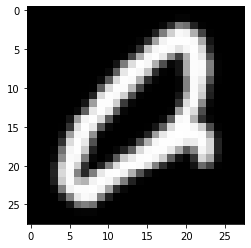

In [402]:
i = 29
image = train_x[i]
plt.imshow(image, cmap='gray')
print("Label: ",train_y[i])

**Selección aleatoria de datos:** Los datos deben ser seleccionados de manera aleatoria, por lo que se define una función que genera una lista para cada letra dónde se indica que índice contiene qué letra, para posteriormente utilizar dicha información en la selección aleatoria de imágenes.

In [403]:
def data_identifier(y_data):
  a_index = []                                                                  # Cada una de estos array contendrá los indices dónde se ubica cada letra
  b_index = []
  c_index = []
  d_index = []
  e_index = []
  f_index = []
  g_index = []
  h_index = []
  i_index = []
  j_index = []
  k_index = []
  l_index = []
  m_index = []
  n_index = []
  o_index = []
  p_index = []
  q_index = []
  r_index = []
  s_index = []
  t_index = []
  u_index = []
  v_index = []
  w_index = []
  x_index = []
  y_index = []
  z_index = []
  i = 0                                                                         # Inicia contador en cero

  for i in range(len(y_data)):                                                  # Recorre los labels y distribuye los indices en sus respectivas listas
    if y_data[i] == 1:
      a_index.append(i)
    if y_data[i] == 2:
      b_index.append(i)
    if y_data[i] == 3:
      c_index.append(i)
    if y_data[i] == 4:
      d_index.append(i)
    if y_data[i] == 5:
      e_index.append(i)
    if y_data[i] == 6:
      f_index.append(i)
    if y_data[i] == 7:
      g_index.append(i)
    if y_data[i] == 8:
      h_index.append(i)
    if y_data[i] == 9:
      i_index.append(i)
    if y_data[i] == 10:
      j_index.append(i)
    if y_data[i] == 11:
      k_index.append(i)
    if y_data[i] == 12:
      l_index.append(i)
    if y_data[i] == 13:
      m_index.append(i)
    if y_data[i] == 14:
      n_index.append(i)
    if y_data[i] == 15:
      o_index.append(i)
    if y_data[i] == 16:
      p_index.append(i)
    if y_data[i] == 17:
      q_index.append(i)
    if y_data[i] == 18:
      r_index.append(i)
    if y_data[i] == 19:
      s_index.append(i)
    if y_data[i] == 20:
      t_index.append(i)
    if y_data[i] == 21:
      u_index.append(i)
    if y_data[i] == 22:
      v_index.append(i)
    if y_data[i] == 23:
      w_index.append(i)
    if y_data[i] == 24:
      x_index.append(i)
    if y_data[i] == 25:
      y_index.append(i)
    if y_data[i] == 26:
      z_index.append(i)
  
  return a_index, b_index, c_index, d_index, e_index, f_index, g_index, h_index, i_index, j_index ,k_index, l_index, m_index, n_index, o_index, p_index, q_index, r_index, s_index, t_index, u_index, v_index, w_index, x_index, y_index, z_index

Ahora se procede a pasar los datos por la función antes definida, de manera que se obtengan 100 datos de cada letra para entrenamiento y 60 datos de cada letra para validación

*Entrenamiento*

In [404]:
a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z = data_identifier(train_y)  # Aplica función que identifica índices

a = np.random.choice(a, 100)                                                    # Sustituye los indices por 100 selecciones aleatorias de las 4800 presentes en cada letra
b = np.random.choice(b, 100)                                                    
c = np.random.choice(c, 100)                                                    
d = np.random.choice(d, 100)                                                    
e = np.random.choice(e, 100)                                                    
f = np.random.choice(f, 100)                                                    
g = np.random.choice(g, 100)                                                    
h = np.random.choice(h, 100)                                                   
i = np.random.choice(i, 100)                                                    
j = np.random.choice(j, 100)                                                    
k = np.random.choice(k, 100)                                                    
l = np.random.choice(l, 100)                                                    
m = np.random.choice(m, 100)                                                  
n = np.random.choice(n, 100)                                                  
o = np.random.choice(o, 100)                                                    
p = np.random.choice(p, 100)                                                
q = np.random.choice(q, 100)                                                    
r = np.random.choice(r, 100)                               
s = np.random.choice(s, 100)                                         
t = np.random.choice(t, 100)                                               
u = np.random.choice(u, 100)                                                
v = np.random.choice(v, 100)
w = np.random.choice(w, 100)                                                   
x = np.random.choice(x, 100)                                                    
y = np.random.choice(y, 100)                                                    
z = np.random.choice(z, 100)                                                    

In [405]:
count = 0                                                                       # Inicia contador en cero

temp_x = []                                                                     # Variable que almacena de forma temporal los valores de x
temp_y = []                                                                     # Variable que almacena de forma temporal los valores de y

for count in a:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in b:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in c:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in d:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in e:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in f:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in g:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in h:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in i:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in j:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in k:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in l:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in m:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in n:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in o:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in p:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in q:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in r:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in s:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in t:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in u:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in v:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in w:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in x:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in y:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])
count = 0 
for count in v:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x[count])
  temp_y.append(train_y[count])


temp_x = np.array(temp_x)
temp_y = np.array(temp_y)

train_x = temp_x                                                                # Carga a los sets de datos las listas simplificadas
train_y = temp_y

*Validación*

In [406]:
a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z = data_identifier(test_y)   # Aplica función que identifica índices

a = np.random.choice(a, 60)                                                     # Sustituye los indices por 60 selecciones aleatorias de las 800 presentes en cada letra
b = np.random.choice(b, 60)                                                    
c = np.random.choice(c, 60)                                                    
d = np.random.choice(d, 60)                                                    
e = np.random.choice(e, 60)                                                    
f = np.random.choice(f, 60)                                                    
g = np.random.choice(g, 60)                                                    
h = np.random.choice(h, 60)                                                   
i = np.random.choice(i, 60)                                                    
j = np.random.choice(j, 60)                                                    
k = np.random.choice(k, 60)                                                    
l = np.random.choice(l, 60)                                                    
m = np.random.choice(m, 60)                                                  
n = np.random.choice(n, 60)                                                  
o = np.random.choice(o, 60)                                                    
p = np.random.choice(p, 60)                                                
q = np.random.choice(q, 60)                                                    
r = np.random.choice(r, 60)                               
s = np.random.choice(s, 60)                                         
t = np.random.choice(t, 60)                                               
u = np.random.choice(u, 60)                                                
v = np.random.choice(v, 60)
w = np.random.choice(w, 60)                                                   
x = np.random.choice(x, 60)                                                    
y = np.random.choice(y, 60)                                                    
z = np.random.choice(z, 60)                                                    

In [407]:
count = 0                                                                       # Inicia contador en cero

temp_x = []                                                                     # Variable que almacena de forma temporal los valores de x
temp_y = []                                                                     # Variable que almacena de forma temporal los valores de y

for count in a:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in b:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in c:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in d:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in e:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in f:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in g:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in h:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in i:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in j:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in k:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in l:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in m:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in n:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in o:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in p:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in q:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in r:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in s:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in t:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in u:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in v:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in w:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in x:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in y:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])
count = 0 
for count in v:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x[count])
  temp_y.append(test_y[count])

temp_x = np.array(temp_x)
temp_y = np.array(temp_y)

test_x = temp_x                                                                 # Carga a los sets de datos las listas simplificadas
test_y = temp_y


Para el set de dígitos también es necesario truncar la cantidad de datos debido a que si no, la red sería sumamente lenta, por lo que decidirá que se utilizaran 250 eemplos seleccionados aleatoriamente para el entrenamiento y 150 para el test. 

In [408]:
def data_identifier_n(y_data):
  a_index = []                                                                  # Cada una de estos array contendrá los indices dónde se ubica cada letra
  b_index = []
  c_index = []
  d_index = []
  e_index = []
  f_index = []
  g_index = []
  h_index = []
  i_index = []
  j_index = []

  i = 0                                                                         # Inicia contador en cero

  for i in range(len(y_data)):                                                  # Recorre los labels y distribuye los indices en sus respectivas listas
    if y_data[i] == 0:
      a_index.append(i)
    if y_data[i] == 1:
      b_index.append(i)
    if y_data[i] == 2:
      c_index.append(i)
    if y_data[i] == 3:
      d_index.append(i)
    if y_data[i] == 4:
      e_index.append(i)
    if y_data[i] == 5:
      f_index.append(i)
    if y_data[i] == 6:
      g_index.append(i)
    if y_data[i] == 7:
      h_index.append(i)
    if y_data[i] == 8:
      i_index.append(i)
    if y_data[i] == 9:
      j_index.append(i)

  
  return a_index, b_index, c_index, d_index, e_index, f_index, g_index, h_index, i_index, j_index

Datos de entrenamiento:

In [409]:
a,b,c,d,e,f,g,h,i,j = data_identifier_n(train_y_n)                              # Aplica función que identifica índices

a = np.random.choice(a, 250)                                                    # Sustituye los indices por 100 selecciones aleatorias de las 6000 presentes en cada digito
b = np.random.choice(b, 250)                                                    
c = np.random.choice(c, 250)                                                    
d = np.random.choice(d, 250)                                                    
e = np.random.choice(e, 250)                                                    
f = np.random.choice(f, 250)                                                    
g = np.random.choice(g, 250)                                                    
h = np.random.choice(h, 250)                                                   
i = np.random.choice(i, 250)                                                    
j = np.random.choice(j, 250)                                                    

In [410]:
count = 0                                                                       # Inicia contador en cero

temp_x = []                                                                     # Variable que almacena de forma temporal los valores de x
temp_y = []                                                                     # Variable que almacena de forma temporal los valores de y

for count in a:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x_n[count])
  temp_y.append(train_y_n[count])
count = 0 
for count in b:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x_n[count])
  temp_y.append(train_y_n[count])
count = 0 
for count in c:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x_n[count])
  temp_y.append(train_y_n[count])
count = 0 
for count in d:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x_n[count])
  temp_y.append(train_y_n[count])
count = 0 
for count in e:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x_n[count])
  temp_y.append(train_y_n[count])
count = 0 
for count in f:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x_n[count])
  temp_y.append(train_y_n[count])
count = 0 
for count in g:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x_n[count])
  temp_y.append(train_y_n[count])
count = 0 
for count in h:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x_n[count])
  temp_y.append(train_y_n[count])
count = 0 
for count in i:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x_n[count])
  temp_y.append(train_y_n[count])
count = 0 
for count in j:                                                                 # Asigna valores a variables temporales
  temp_x.append(train_x_n[count])
  temp_y.append(train_y_n[count])
count = 0 

temp_x = np.array(temp_x)
temp_y = np.array(temp_y)

train_x_n = temp_x                                                              # Carga a los sets de datos las listas simplificadas
train_y_n = temp_y

Datos de validación:

In [411]:
a,b,c,d,e,f,g,h,i,j = data_identifier_n(test_y_n)                               # Aplica función que identifica índices

a = np.random.choice(a, 250)                                                    # Sustituye los indices por 100 selecciones aleatorias de las 6000 presentes en cada digito
b = np.random.choice(b, 250)                                                    
c = np.random.choice(c, 250)                                                    
d = np.random.choice(d, 250)                                                    
e = np.random.choice(e, 250)                                                    
f = np.random.choice(f, 250)                                                    
g = np.random.choice(g, 250)                                                    
h = np.random.choice(h, 250)                                                   
i = np.random.choice(i, 250)                                                    
j = np.random.choice(j, 250)

In [412]:
count = 0                                                                       # Inicia contador en cero

temp_x = []                                                                     # Variable que almacena de forma temporal los valores de x
temp_y = []                                                                     # Variable que almacena de forma temporal los valores de y

for count in a:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x_n[count])
  temp_y.append(test_y_n[count])
count = 0 
for count in b:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x_n[count])
  temp_y.append(test_y_n[count])
count = 0 
for count in c:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x_n[count])
  temp_y.append(test_y_n[count])
count = 0 
for count in d:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x_n[count])
  temp_y.append(test_y_n[count])
count = 0 
for count in e:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x_n[count])
  temp_y.append(test_y_n[count])
count = 0 
for count in f:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x_n[count])
  temp_y.append(test_y_n[count])
count = 0 
for count in g:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x_n[count])
  temp_y.append(test_y_n[count])
count = 0 
for count in h:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x_n[count])
  temp_y.append(test_y_n[count])
count = 0 
for count in i:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x_n[count])
  temp_y.append(test_y_n[count])
count = 0 
for count in j:                                                                 # Asigna valores a variables temporales
  temp_x.append(test_x_n[count])
  temp_y.append(test_y_n[count])
count = 0 

temp_x = np.array(temp_x)
temp_y = np.array(temp_y)

test_x_n = temp_x                                                               # Carga a los sets de datos las listas simplificadas
test_y_n = temp_y

**Normalización de los datos:** primeramente se establece el tamaño de la imágen, la cual es de 28x28 pixeles y se le da formato a los datos para normalizarlos, el normalizado consistirá entomar los valores de los pixeles, que estan en el rango [0,255] y escalarlos al rango [0,1] con el uso de flotantes

In [413]:
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1)).astype(float)          # Reshape para tener un único canal de color
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1)).astype(float)  

train_x = train_x/255                                                           # Escalamiento de 0 a 1
test_x = test_x/255                                                             # Escalamiento de 0 a 1

Ahora, a los labels se les aplica OneHotEncoder para codificarlos

In [414]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

También se normalizan los datos para dígitos:

In [415]:
train_x_n = train_x_n.reshape((train_x_n.shape[0], 28, 28, 1)).astype(float)    # Reshape para tener un único canal de color
test_x_n = test_x_n.reshape((test_x_n.shape[0], 28, 28, 1)).astype(float)  

train_x_n = train_x_n/255                                                       # Escalamiento de 0 a 1
test_x_n = test_x_n/255   

In [416]:
train_y_n = to_categorical(train_y_n)
test_y_n = to_categorical(test_y_n)

###**Modelado de la red**

**Definición del modelo de la red:** se define una función capaz de modelar una red neuronal convolucional y entrenarla con un número variable de filtros o kernels de un tamaño de 3x3

In [417]:
def convolutional_model(core, classes):
  core = int(core)
  model = Sequential()
  model.add(Conv2D(core, (5,5), activation='relu', 
                   kernel_initializer='HeUniform', input_shape=(28, 28, 1)))    # Capa única de filtos convolucionales
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2))
  model.add(Flatten())                                                          # Aplana datos
  model.add(Dense(150, activation='relu'))                                      # Capa 'oculta' de la red de salida (ANN)
  model.add(Dense(classes, activation='softmax'))                               # Capa de salida de la red neuronal
  model.compile(loss='categorical_crossentropy',                                # Compilado de la red neuronal
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics='accuracy')
  return model

### **Redes Neuronales Convolucionales**

***Redes Neuronales Convolucionales:*** en la siguiente sección de código se presentan todas las redes solicitadas en el enunciado de la tarea, en cada uno de las redes, también se presenta a forma del mapa de activación generado por cada kernel, uno por letra así como el análisis correspondiente de las redes propuesto en el enunciado.

#####**Red A. CNN de una capa de procesado con un total de 8 núcleos de convolución**

Utilizando los datos que se manipularon previamente para cumplir con las disposisiones del enunciado, y la función que modela y compila la red neuronal convonucional de una capa, se crea la primera red solicitada, la cual cuenta con 8 núcleos de convolución en su primera capa de procesado, y además, según se dispuso en el modelo, la red adjunta tiene una capa oculta de 150 neuronas. La red se entrenará durante 15 iteraciones para después ser evaluada con el set de datos de validación. 

In [418]:
network_1 = convolutional_model (8, 26)                                         # Modela y compila red, con 8 kernels y 26 clases

network_1.fit(train_x, train_y, epochs = 15, verbose = 2)                       # Entrena la red

Epoch 1/15
82/82 - 1s - loss: 1.9405 - accuracy: 0.4569
Epoch 2/15
82/82 - 1s - loss: 0.8393 - accuracy: 0.7273
Epoch 3/15
82/82 - 1s - loss: 0.5414 - accuracy: 0.8096
Epoch 4/15
82/82 - 1s - loss: 0.4123 - accuracy: 0.8588
Epoch 5/15
82/82 - 1s - loss: 0.3078 - accuracy: 0.8900
Epoch 6/15
82/82 - 1s - loss: 0.2656 - accuracy: 0.9062
Epoch 7/15
82/82 - 1s - loss: 0.2349 - accuracy: 0.9188
Epoch 8/15
82/82 - 1s - loss: 0.1951 - accuracy: 0.9219
Epoch 9/15
82/82 - 1s - loss: 0.1888 - accuracy: 0.9335
Epoch 10/15
82/82 - 1s - loss: 0.1416 - accuracy: 0.9458
Epoch 11/15
82/82 - 1s - loss: 0.1586 - accuracy: 0.9396
Epoch 12/15
82/82 - 1s - loss: 0.1465 - accuracy: 0.9454
Epoch 13/15
82/82 - 1s - loss: 0.1401 - accuracy: 0.9496
Epoch 14/15
82/82 - 1s - loss: 0.1602 - accuracy: 0.9469
Epoch 15/15
82/82 - 1s - loss: 0.1207 - accuracy: 0.9535


In [419]:
val_loss, val_accuracy = network_1.evaluate(test_x, test_y)                     # Valida la red con los datos de test

49/49 [==============================] - 0s 6ms/step - loss: 1.4080 - accuracy: 0.7724


En el siguiente bloque se visualiza la función que realiza cada uno de los núcleos de convolución:

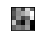

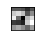

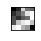

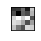

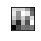

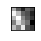

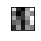

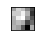

In [420]:
filters, biases = network_1.layers[0].get_weights()
filter_min, filter_max = filters.min(), filters.max()
filters = (filters - filter_min) / (filter_max - filter_min)

filter_number, ix = 8, 1                                                        # Establece el # de filtros
for i in range(filter_number):
  f = filters[:, :, :, i]
  for j in range(1):
    ax = plt.subplot(filter_number, 4, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray')
    ix += 1
  plt.show()
  ix = 1


Ahora, como se olantea en el enunciado, se procede con la visualición de cada uno de los 8 núcleos de convolución aplicados a cada una de las letras: 

In [421]:
letter_images = []
letter_labels = []
c = 0
for i in range(26):
  letter_images.append(train_x[c])
  letter_labels.append(train_y[c])
  c = c + 101

letter_images = np.array(letter_images)
letter_images.shape

(26, 28, 28, 1)

In [422]:
network = Model(inputs = network_1.inputs,                                      # Obtiene datos de la primera capa del modelo convolucional
                              outputs = network_1.layers[0].output)
network.summary()

Model: "model_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 8)         208       
Total params: 208
Trainable params: 208
Non-trainable params: 0
_________________________________________________________________


Letra  a


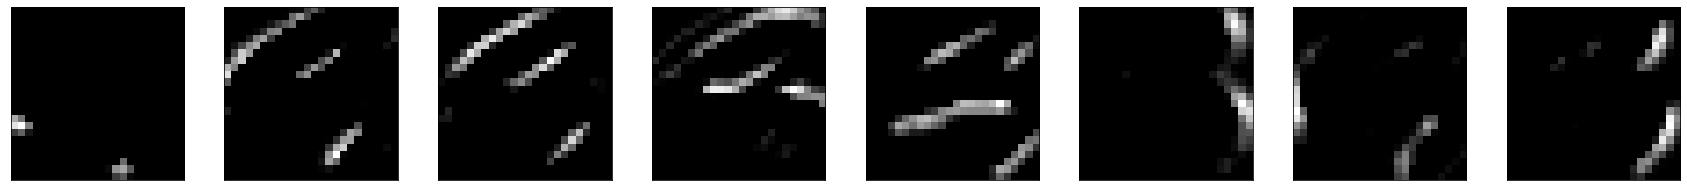

Letra  b


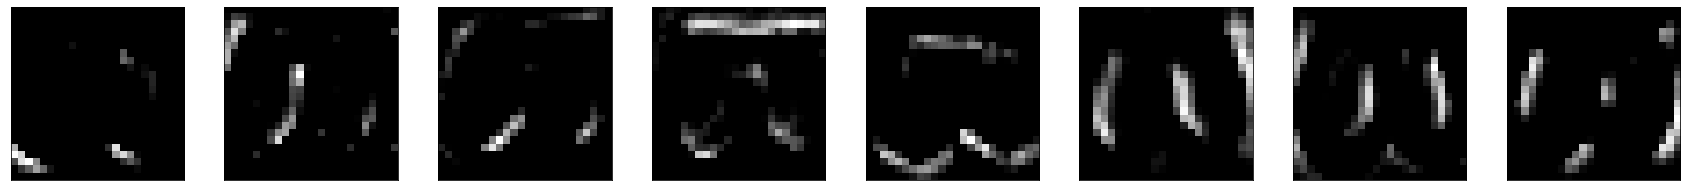

Letra  c


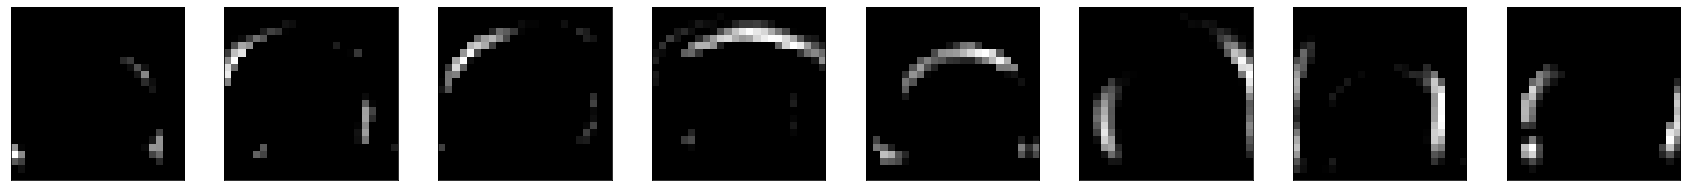

Letra  d


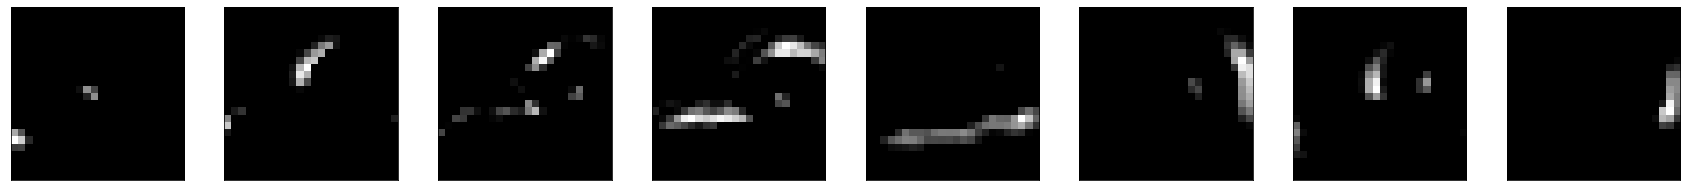

Letra  e


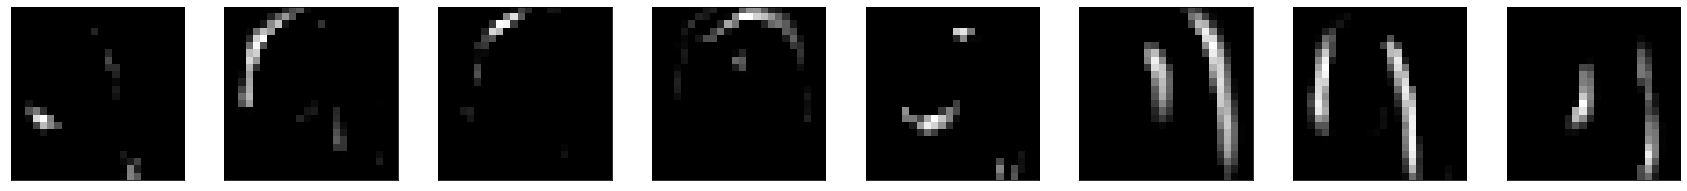

Letra  f


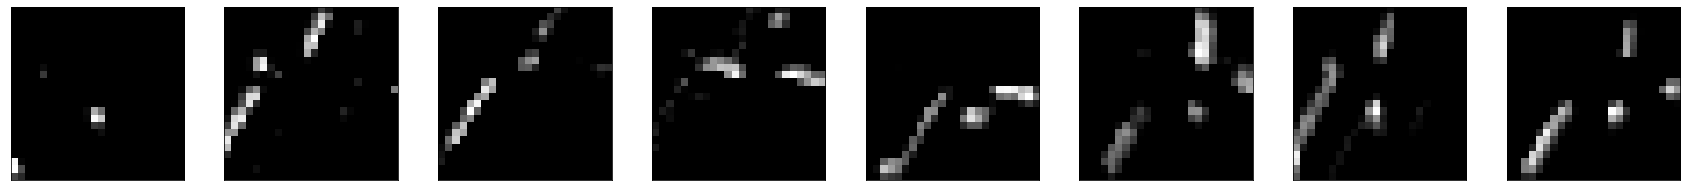

Letra  g


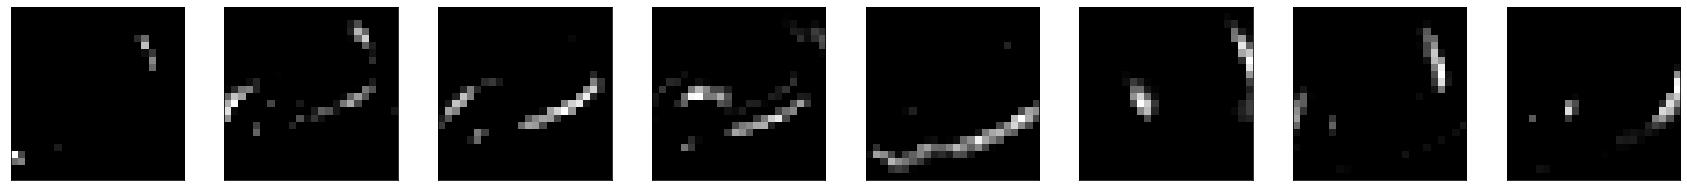

Letra  h


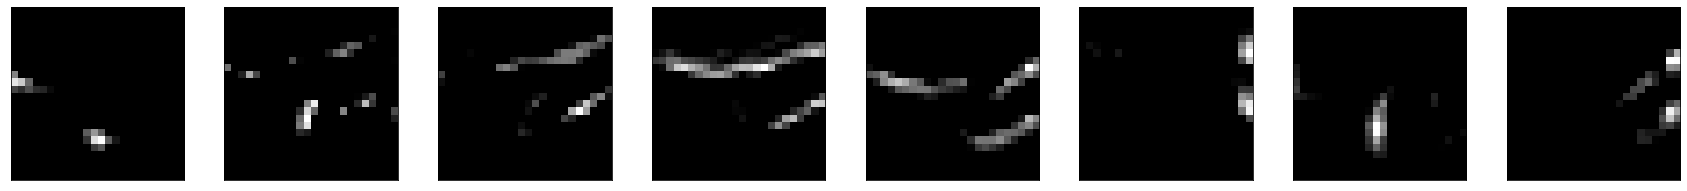

Letra  i


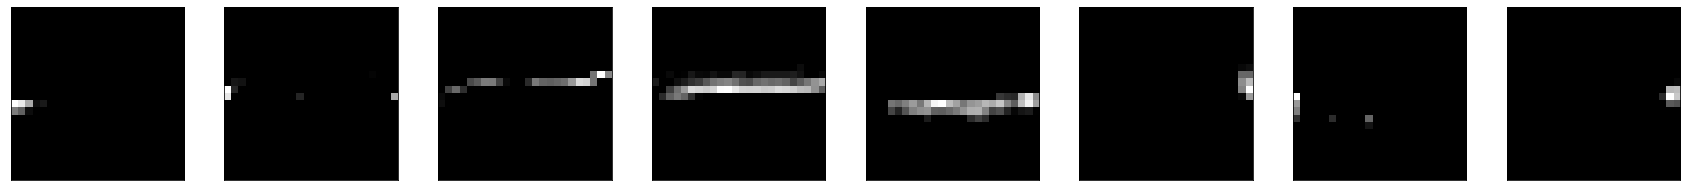

Letra  j


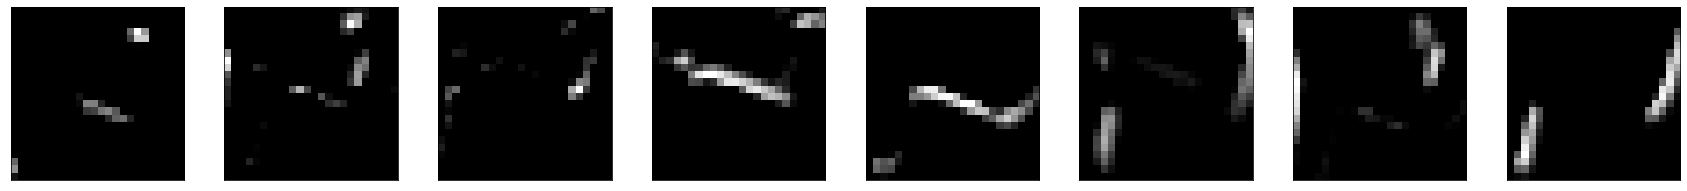

Letra  k


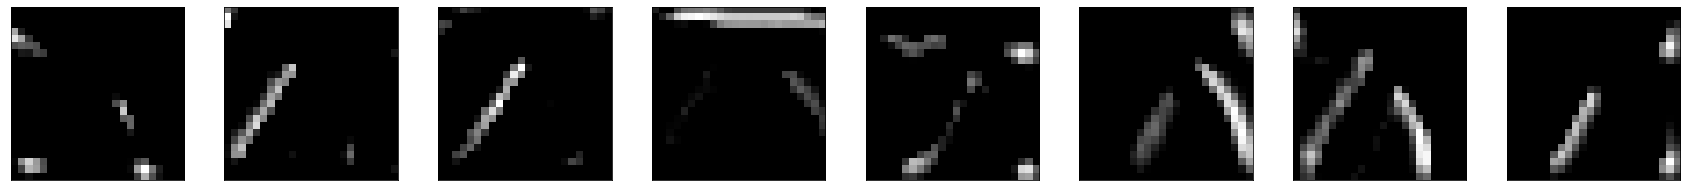

Letra  l


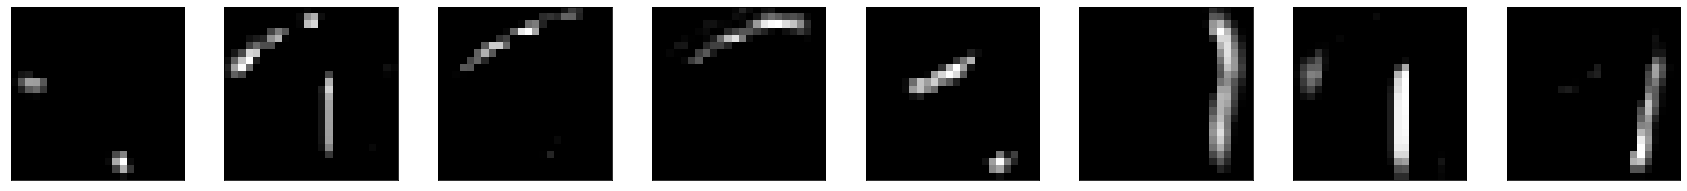

Letra  m


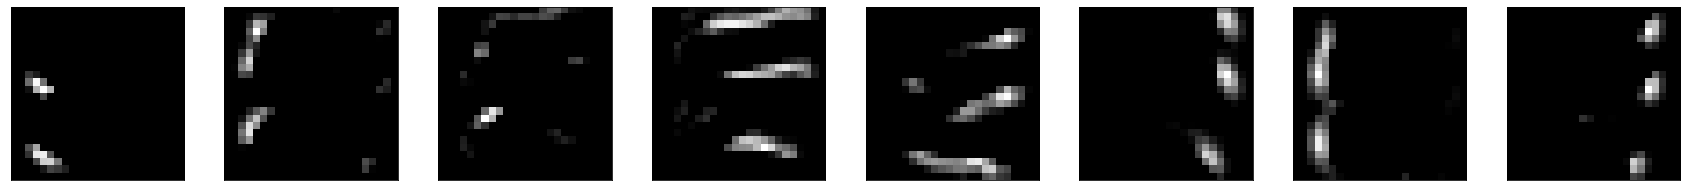

Letra  n


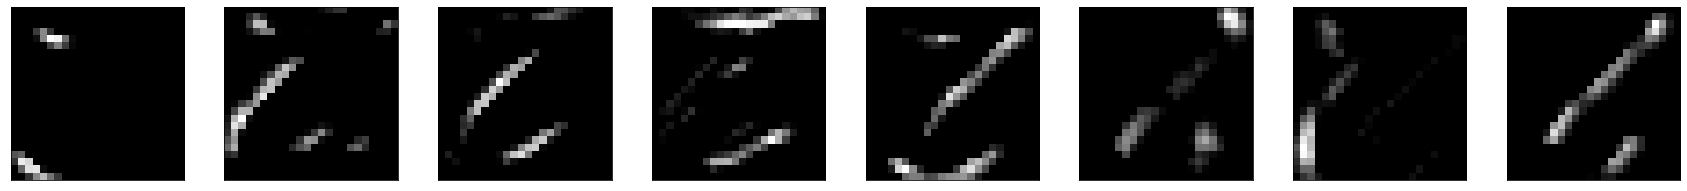

Letra  o


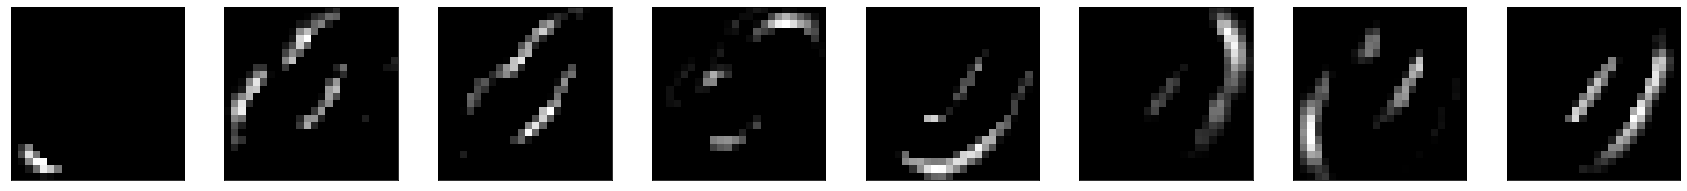

Letra  p


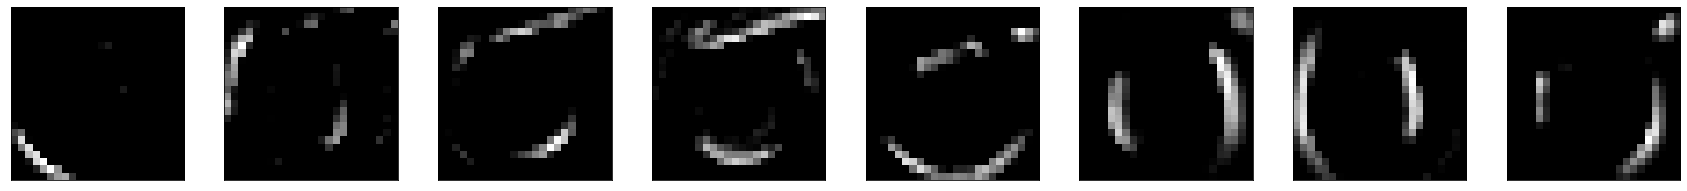

Letra  q


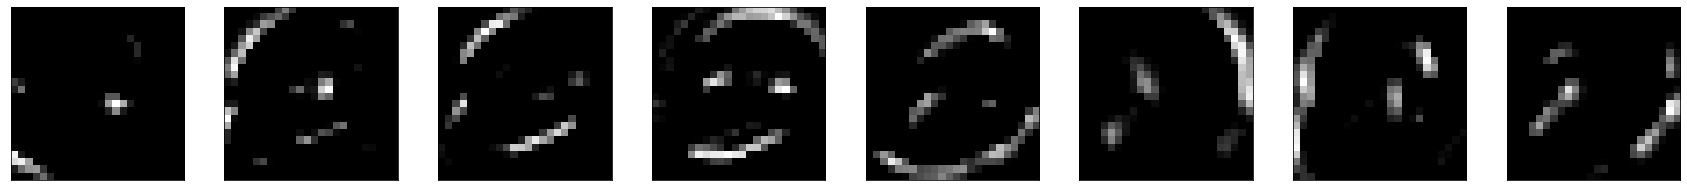

Letra  r


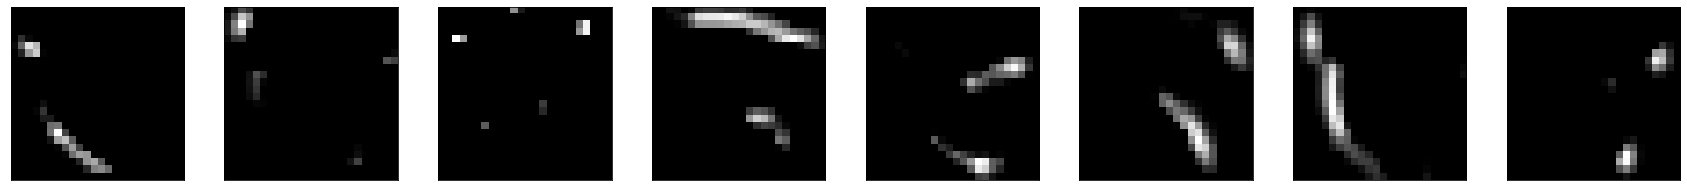

Letra  s


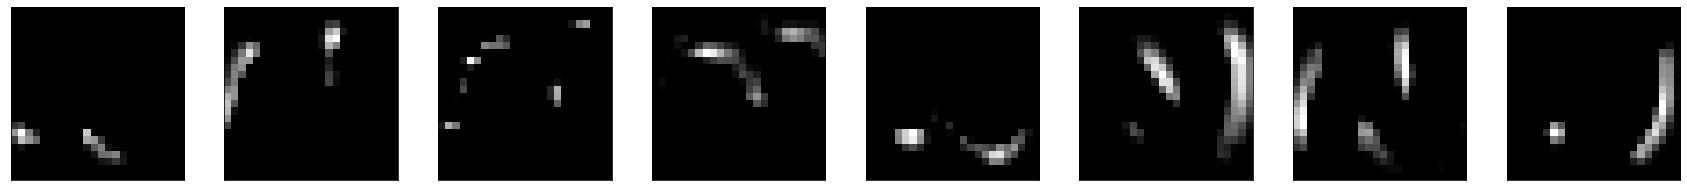

Letra  t


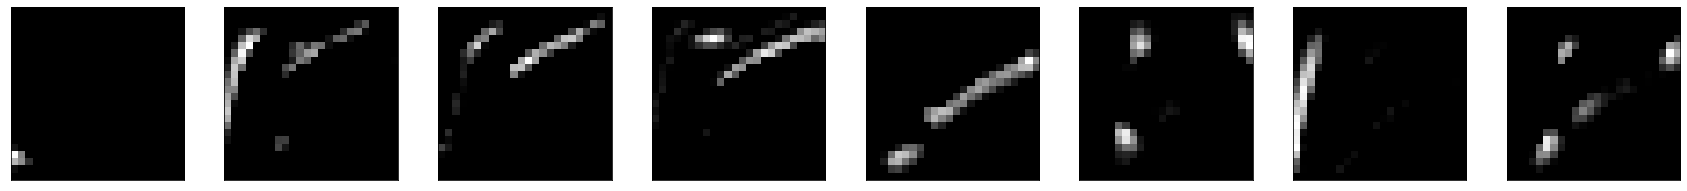

Letra  u


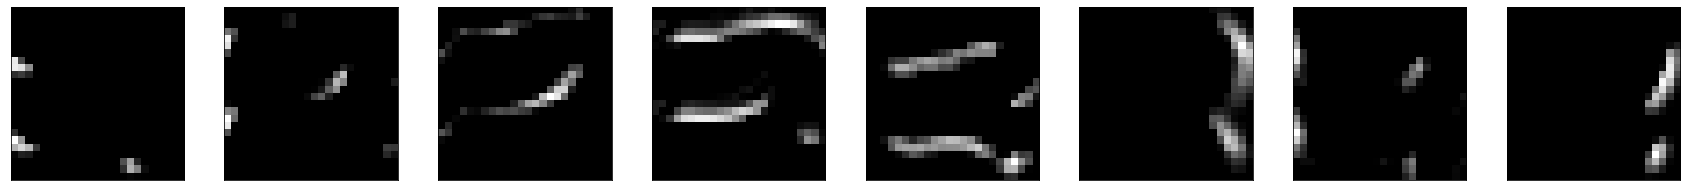

Letra  v


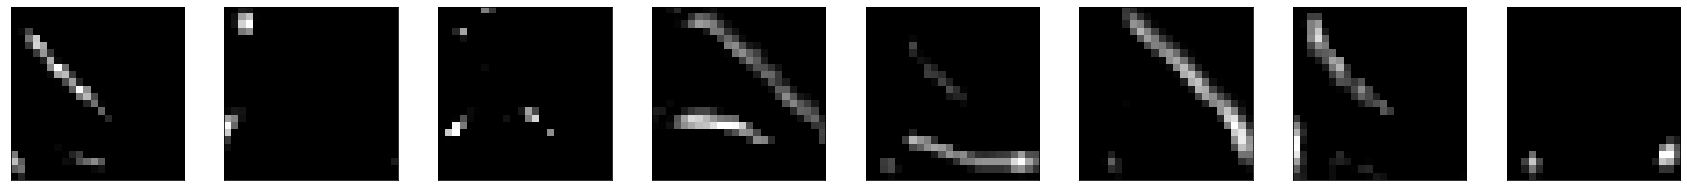

Letra  w


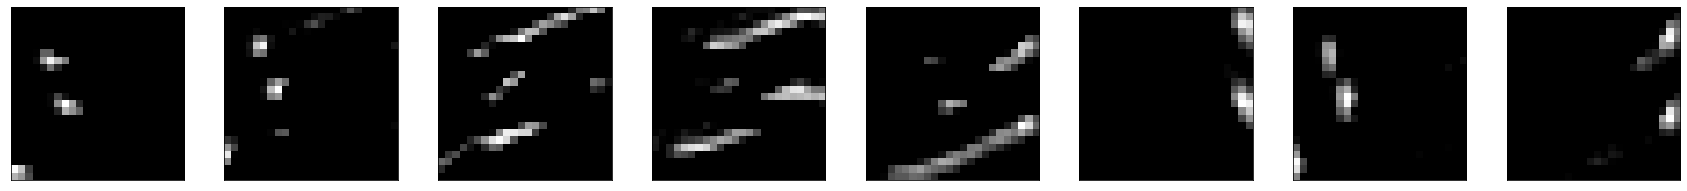

Letra  x


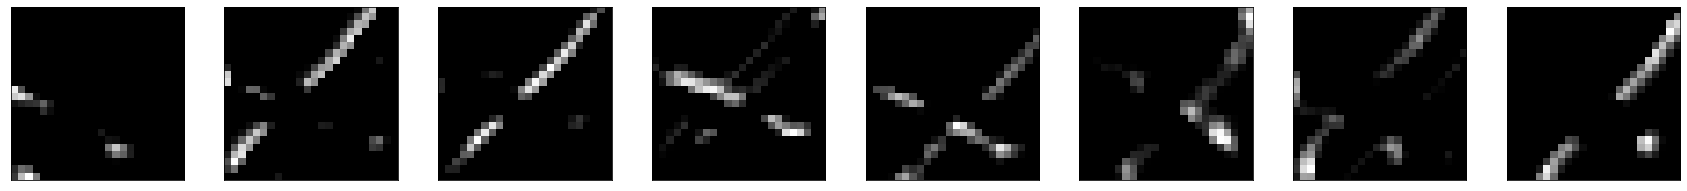

Letra  y


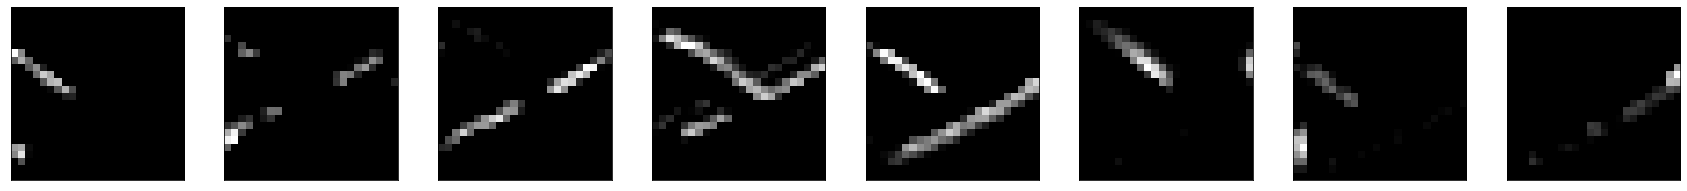

Letra  z


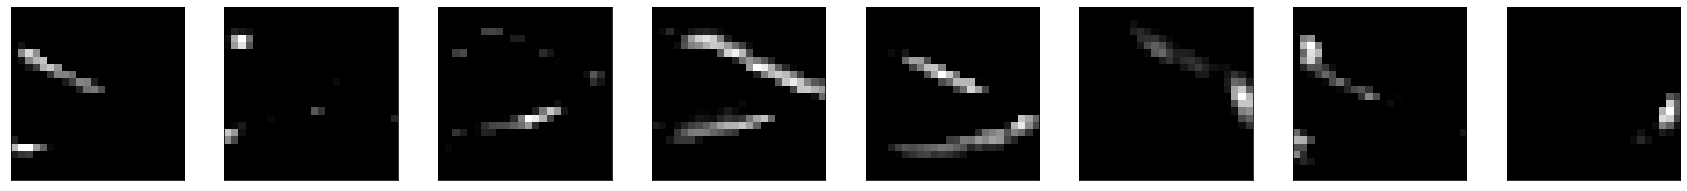

In [423]:
maps = network.predict(letter_images)
square = 8                                                                      # Define filas de 8 columnas de impresión en plt.show
ix = 1
letter = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i','j', 'k', 'l', 'm', 'n',
          'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

for n in range(len(letter_images)):                                             # Ejecuta el plt show para todas las letras
  plt.figure(figsize=(30, 30) ) 
  for i in range(4):
    for i in range(2):
      ax = plt.subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(maps[n, :, :, ix-1], cmap='gray')
      ix += 1
  print('Letra ', letter[n])
  plt.show()
  ix = 1 

Una vez obtenidos los mapas, se procede a ejecutar el modelo pero esta vez con imágenes de **dígitos**, no de letras, para comprobar el funcionamiento de la red, se entrena una nueva red con las mismas características con el set de digitos

In [424]:
train_x_n.shape

(2500, 28, 28, 1)

In [425]:
train_y_n.shape

(2500, 10)

In [426]:
network_2 = convolutional_model (8, 10)                                         # Modela y compila red, con 8 kernels y 10 clases

network_2.fit(train_x_n, train_y_n, epochs = 15, verbose = 2)                   # Entrena la red

Epoch 1/15
79/79 - 1s - loss: 0.7697 - accuracy: 0.7776
Epoch 2/15
79/79 - 1s - loss: 0.1860 - accuracy: 0.9456
Epoch 3/15
79/79 - 1s - loss: 0.1141 - accuracy: 0.9640
Epoch 4/15
79/79 - 1s - loss: 0.0902 - accuracy: 0.9696
Epoch 5/15
79/79 - 1s - loss: 0.0802 - accuracy: 0.9756
Epoch 6/15
79/79 - 1s - loss: 0.0473 - accuracy: 0.9848
Epoch 7/15
79/79 - 1s - loss: 0.0516 - accuracy: 0.9832
Epoch 8/15
79/79 - 1s - loss: 0.0557 - accuracy: 0.9816
Epoch 9/15
79/79 - 1s - loss: 0.0476 - accuracy: 0.9836
Epoch 10/15
79/79 - 1s - loss: 0.0664 - accuracy: 0.9756
Epoch 11/15
79/79 - 1s - loss: 0.0516 - accuracy: 0.9820
Epoch 12/15
79/79 - 1s - loss: 0.0177 - accuracy: 0.9936
Epoch 13/15
79/79 - 1s - loss: 0.0537 - accuracy: 0.9856
Epoch 14/15
79/79 - 1s - loss: 0.0328 - accuracy: 0.9880
Epoch 15/15
79/79 - 1s - loss: 0.0295 - accuracy: 0.9924


In [427]:
val_loss, val_accuracy = network_2.evaluate(test_x_n, test_y_n)                 # Valida la red con los datos de test

79/79 [==============================] - 1s 6ms/step - loss: 0.3046 - accuracy: 0.9500


Ahora se muestran los mapas de activación para cada número

In [428]:
number_images = []
number_labels = []
c = 0
for i in range(10):
  number_images.append(train_x_n[c])
  number_labels.append(train_y_n[c])
  c = c + 250

number_images = np.array(number_images)
number_images.shape

(10, 28, 28, 1)

In [429]:
network = Model(inputs = network_2.inputs,                                      # Obtiene datos de la primera capa del modelo convolucional
                              outputs = network_2.layers[0].output)
network.summary()

Model: "model_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 8)         208       
Total params: 208
Trainable params: 208
Non-trainable params: 0
_________________________________________________________________


Dígito  0


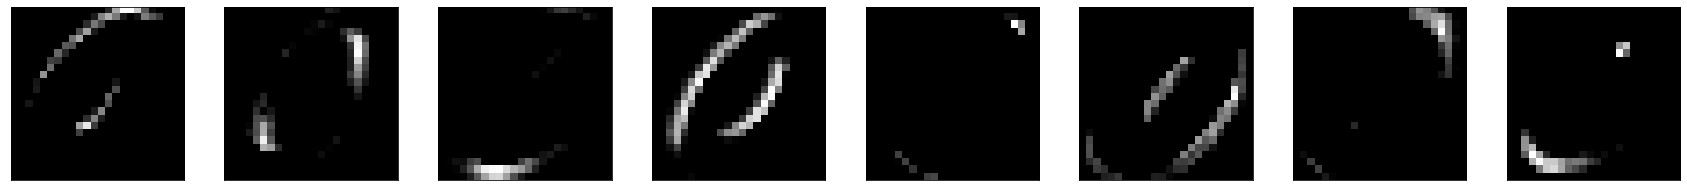

Dígito  1


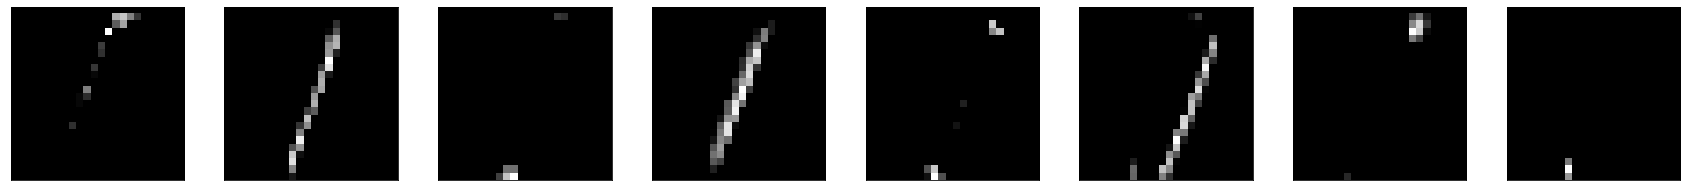

Dígito  2


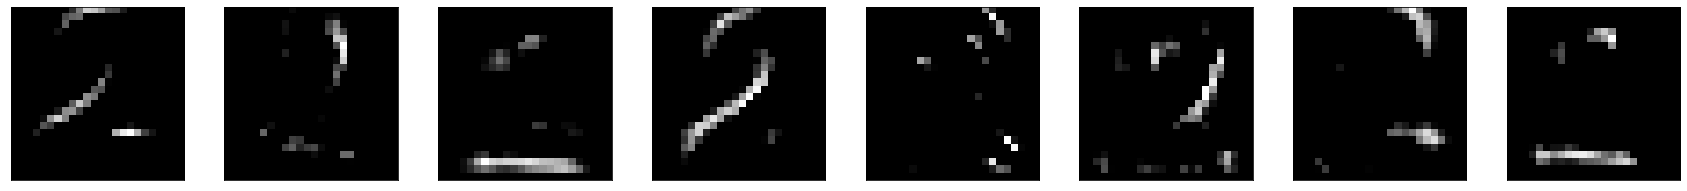

Dígito  3


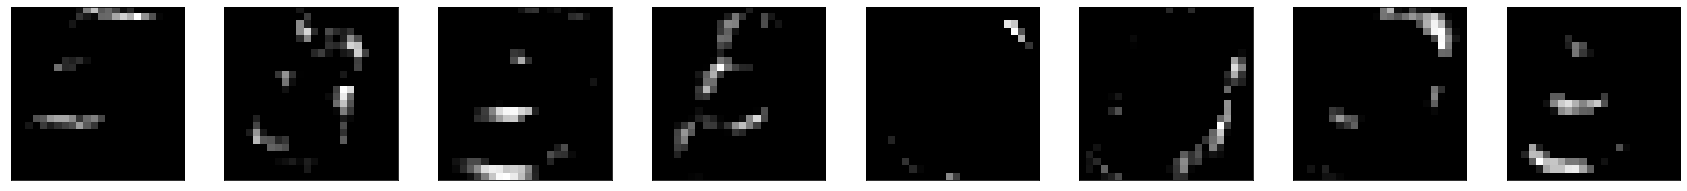

Dígito  4


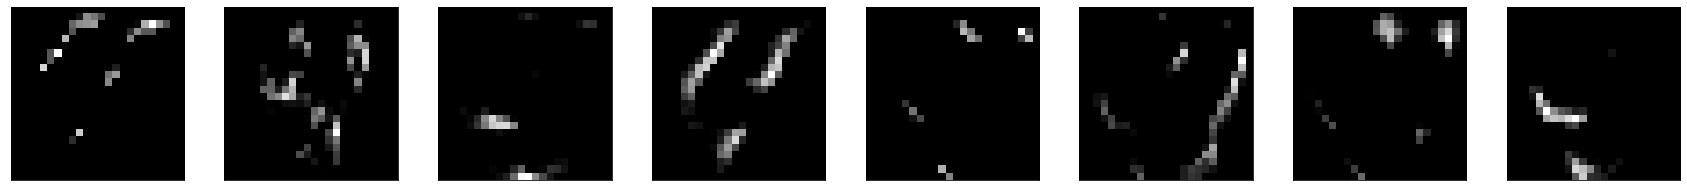

Dígito  5


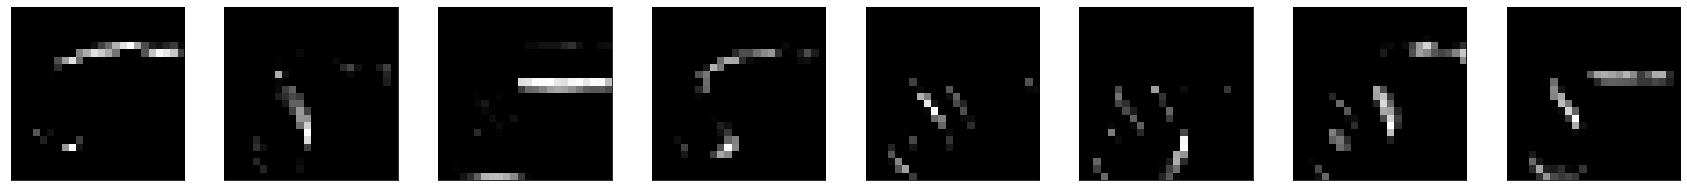

Dígito  6


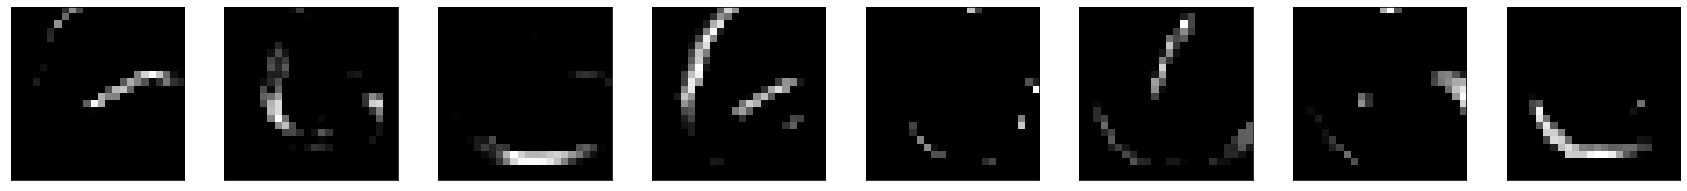

Dígito  7


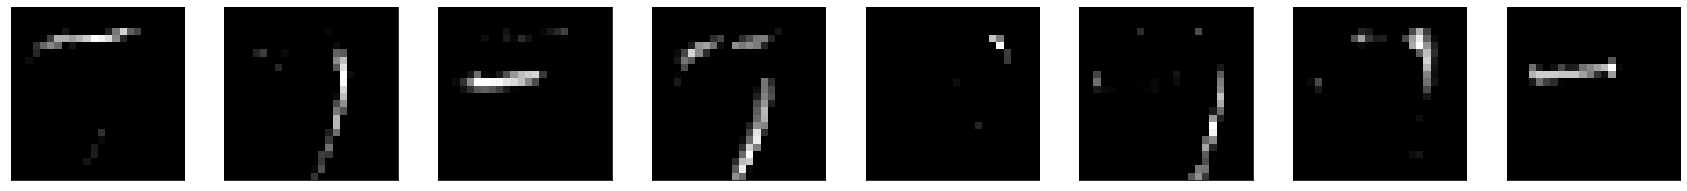

Dígito  8


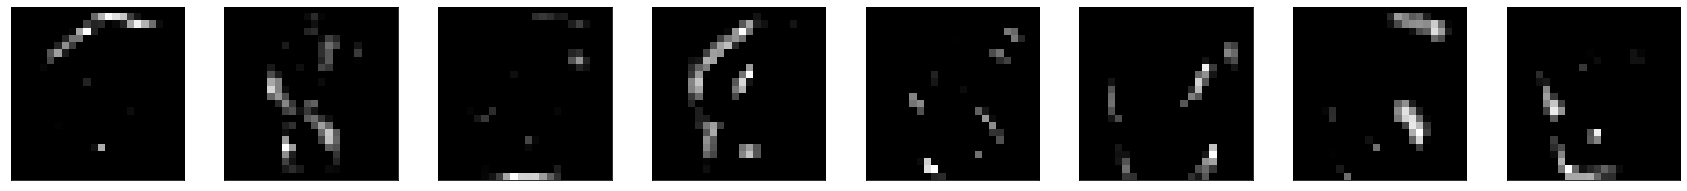

Dígito  9


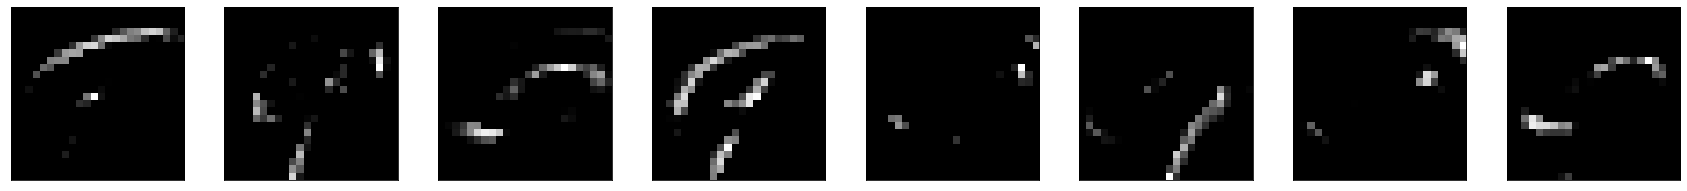

In [430]:
maps = network.predict(number_images)
square = 8                                                                      # Define filas de 8 columnas de impresión en plt.show
ix = 1
number = ['0', '1', '2', '3', '4', '5', '6', '7', '8','9']
for n in range(len(number_images)):                                             # Ejecuta el plt show para todas las letras
  plt.figure(figsize=(30, 30) )
  for i in range(4):
    for i in range(2):
      ax = plt.subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(maps[n, :, :, ix-1], cmap='gray')
      ix += 1
  print('Dígito ', number[n])
  plt.show()
  ix = 1 

#####**Red B. CNN de una capa de procesado con un total de 16 núcleos de convolución**

Utilizando los datos que se manipularon previamente para cumplir con las disposisiones del enunciado, y la función que modela y compila la red neuronal convonucional de una capa, se crea la primera red solicitada, la cual cuenta con 16 núcleos de convolución en su primera capa de procesado, y además, según se dispuso en el modelo, la red adjunta tiene una capa oculta de 150 neuronas. La red se entrenará durante 15 iteraciones para después ser evaluada con el set de datos de validación. 

In [431]:
network_3 = convolutional_model (16, 26)                                        # Modela y compila red, con 16 kernels y 26 clases

network_3.fit(train_x, train_y, epochs = 15, verbose = 2)                       # Entrena la red

val_loss, val_accuracy = network_3.evaluate(test_x, test_y)                     # Valida la red con los datos de test

Epoch 1/15
82/82 - 2s - loss: 2.2464 - accuracy: 0.4265
Epoch 2/15
82/82 - 1s - loss: 0.8385 - accuracy: 0.7308
Epoch 3/15
82/82 - 1s - loss: 0.4782 - accuracy: 0.8365
Epoch 4/15
82/82 - 1s - loss: 0.3440 - accuracy: 0.8727
Epoch 5/15
82/82 - 1s - loss: 0.2422 - accuracy: 0.9115
Epoch 6/15
82/82 - 1s - loss: 0.2132 - accuracy: 0.9200
Epoch 7/15
82/82 - 1s - loss: 0.2001 - accuracy: 0.9285
Epoch 8/15
82/82 - 1s - loss: 0.1572 - accuracy: 0.9438
Epoch 9/15
82/82 - 1s - loss: 0.1373 - accuracy: 0.9550
Epoch 10/15
82/82 - 1s - loss: 0.1852 - accuracy: 0.9346
Epoch 11/15
82/82 - 1s - loss: 0.1717 - accuracy: 0.9377
Epoch 12/15
82/82 - 1s - loss: 0.1123 - accuracy: 0.9588
Epoch 13/15
82/82 - 1s - loss: 0.0748 - accuracy: 0.9742
Epoch 14/15
82/82 - 1s - loss: 0.1198 - accuracy: 0.9627
Epoch 15/15
82/82 - 1s - loss: 0.1132 - accuracy: 0.9550
49/49 [==============================] - 0s 5ms/step - loss: 1.3177 - accuracy: 0.7635


Ahora se visualizan las funciones de cada uno de los núcleos de convolución:

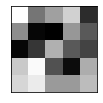

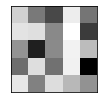

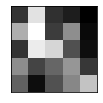

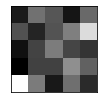

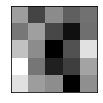

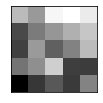

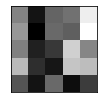

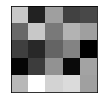

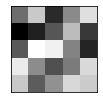

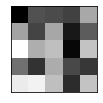

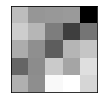

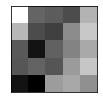

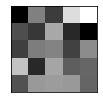

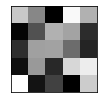

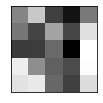

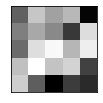

In [432]:
filters, biases = network_3.layers[0].get_weights()
filter_min, filter_max = filters.min(), filters.max()
filters = (filters - filter_min) / (filter_max - filter_min)

filter_number, ix = 16, 1                                                        # Establece el # de filtros
for i in range(filter_number):
  plt.figure(figsize=(30, 30) )
  f = filters[:, :, :, i]
  for j in range(1):
    ax = plt.subplot(filter_number, 2, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray')
    ix += 1
  plt.show()
  ix = 1

Y por último se muestran los mapas de activación para cada letra

Model: "model_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 16)        416       
Total params: 416
Trainable params: 416
Non-trainable params: 0
_________________________________________________________________
Letra  a


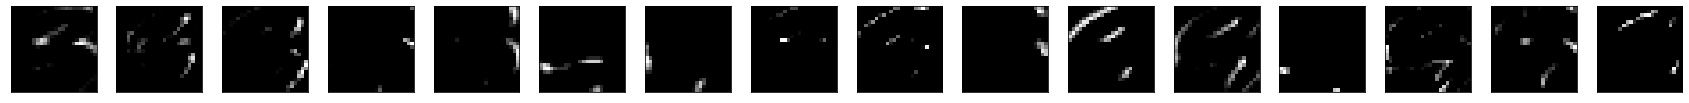

Letra  b


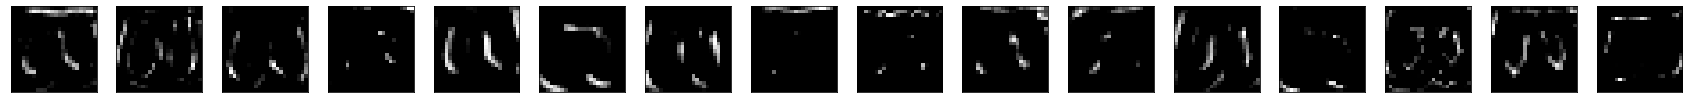

Letra  c


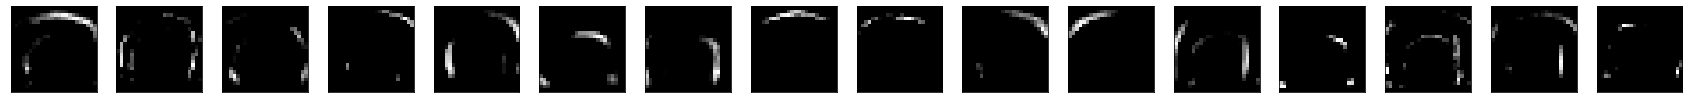

Letra  d


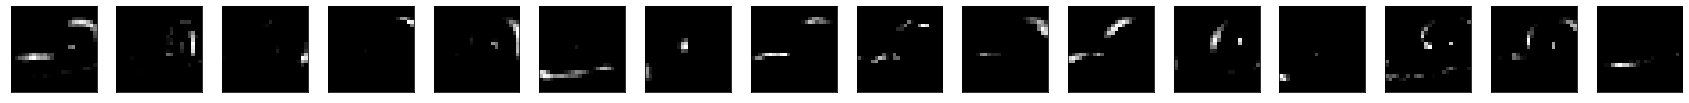

Letra  e


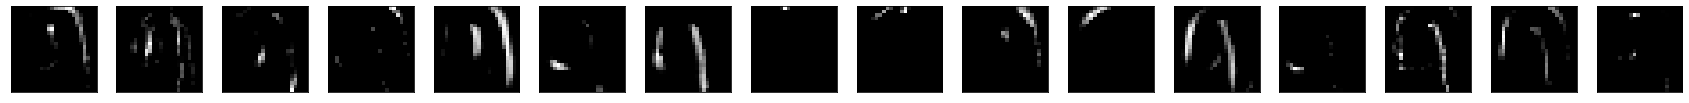

Letra  f


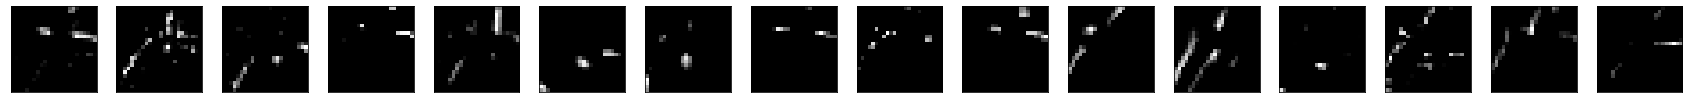

Letra  g


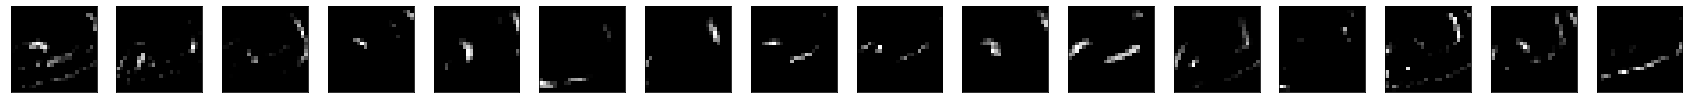

Letra  h


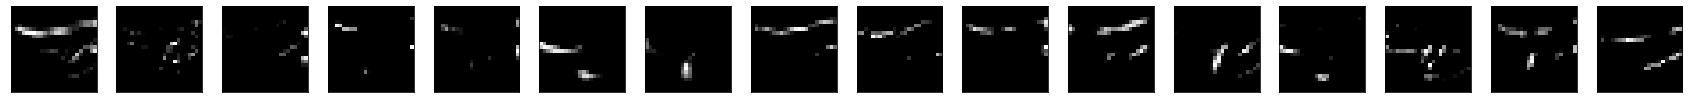

Letra  i


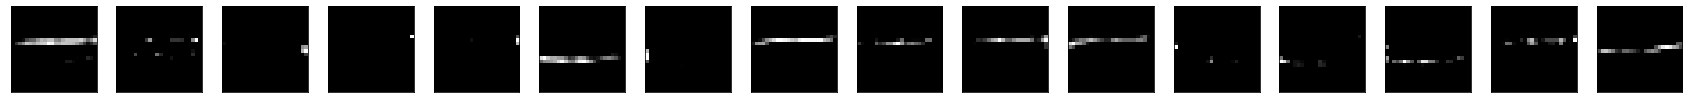

Letra  j


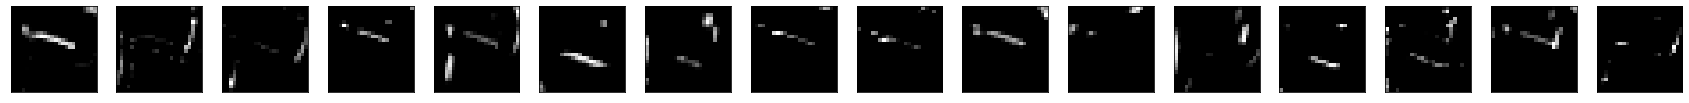

Letra  k


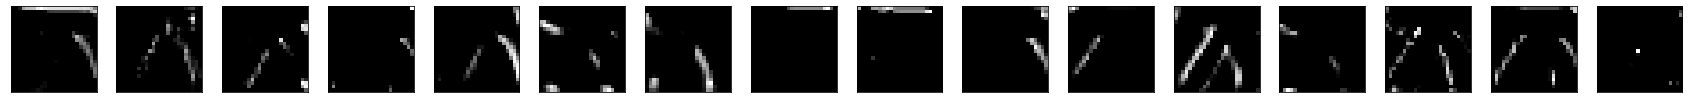

Letra  l


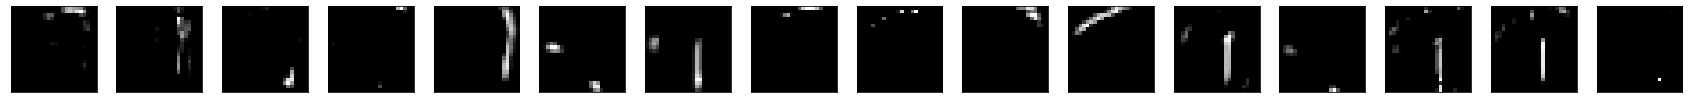

Letra  m


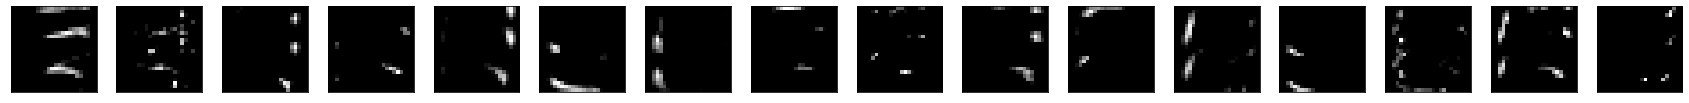

Letra  n


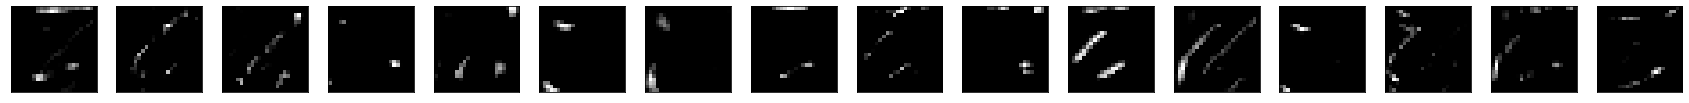

Letra  o


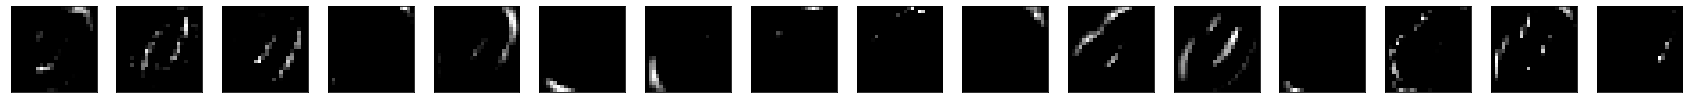

Letra  p


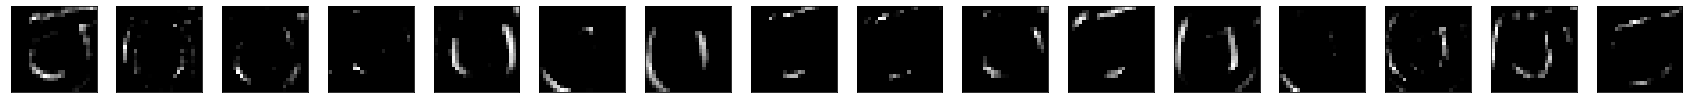

Letra  q


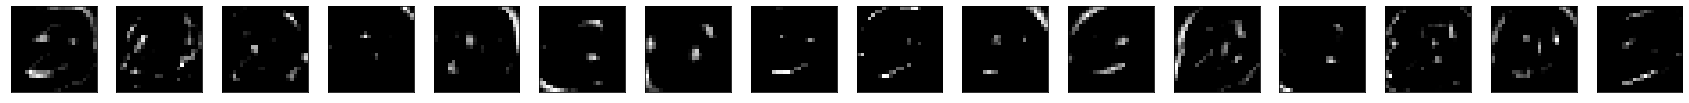

Letra  r


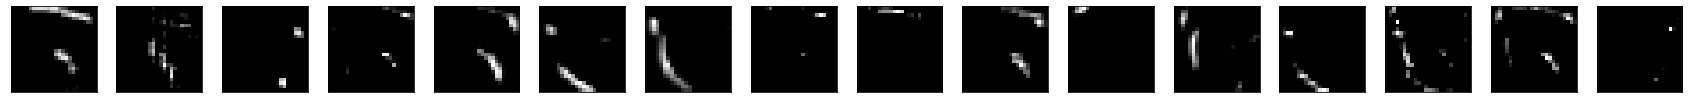

Letra  s


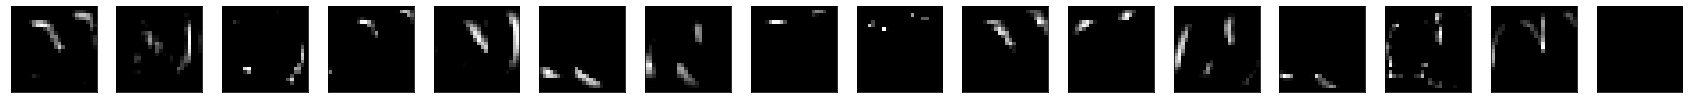

Letra  t


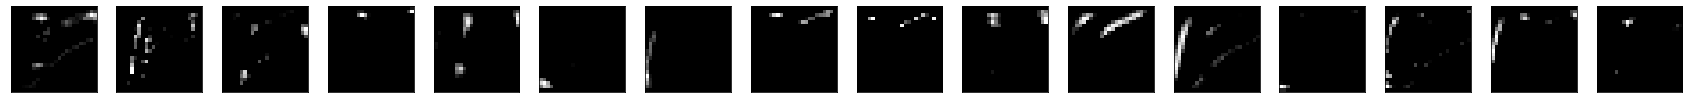

Letra  u


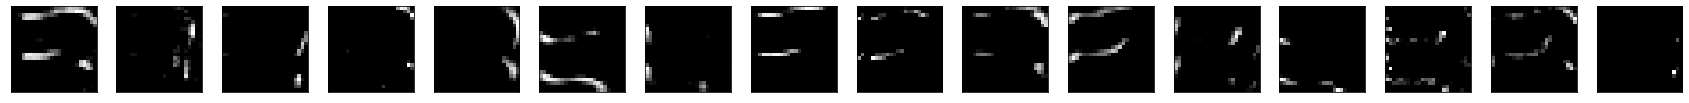

Letra  v


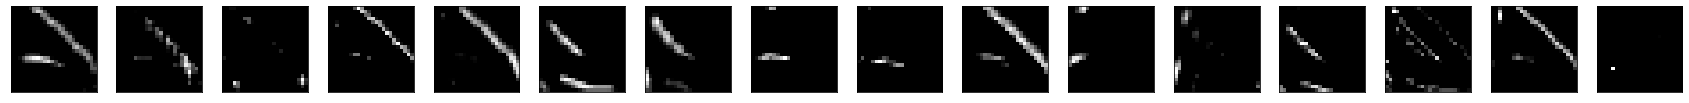

Letra  w


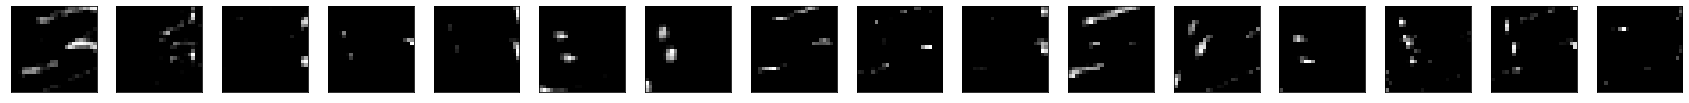

Letra  x


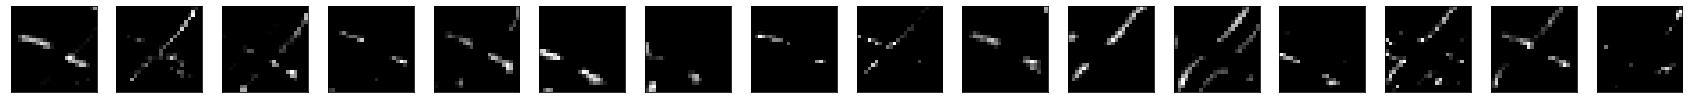

Letra  y


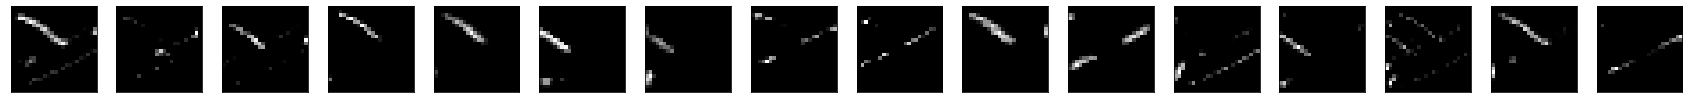

Letra  z


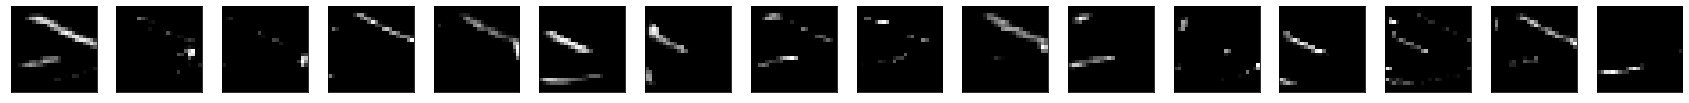

In [433]:
network = Model(inputs = network_3.inputs,                                      # Obtiene datos de la primera capa del modelo convolucional
                              outputs = network_3.layers[0].output)
network.summary()

maps = network.predict(letter_images)
square = 16                                                                      # Define filas de 8 columnas de impresión en plt.show
ix = 1
letter = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i','j', 'k', 'l', 'm', 'n',
          'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

n = 0
for n in range(len(letter_images)):                                             # Ejecuta el plt show para todas las letras
  plt.figure(figsize=(30, 30) )
  for i in range(4):
    for i in range(4):
      ax = plt.subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(maps[n, :, :, ix-1], cmap='gray')
      ix += 1
  print('Letra ', letter[n])
  plt.show()
  ix = 1 

Ahora se utiliza el mismo modelo de red pero esta vez se entrena con imágenes de dígitos:

In [434]:
network_4 = convolutional_model (16, 10)                                        # Modela y compila red, con 16 kernels y 26 clases

network_4.fit(train_x_n, train_y_n, epochs = 15, verbose = 2)                   # Entrena la red

val_loss, val_accuracy = network_4.evaluate(test_x_n, test_y_n)                 # Valida la red con los datos de test

Epoch 1/15
79/79 - 2s - loss: 1.0606 - accuracy: 0.7400
Epoch 2/15
79/79 - 1s - loss: 0.1738 - accuracy: 0.9472
Epoch 3/15
79/79 - 1s - loss: 0.0830 - accuracy: 0.9700
Epoch 4/15
79/79 - 1s - loss: 0.0639 - accuracy: 0.9780
Epoch 5/15
79/79 - 1s - loss: 0.0387 - accuracy: 0.9868
Epoch 6/15
79/79 - 1s - loss: 0.0415 - accuracy: 0.9844
Epoch 7/15
79/79 - 1s - loss: 0.0353 - accuracy: 0.9888
Epoch 8/15
79/79 - 1s - loss: 0.0221 - accuracy: 0.9928
Epoch 9/15
79/79 - 1s - loss: 0.0249 - accuracy: 0.9936
Epoch 10/15
79/79 - 1s - loss: 0.0231 - accuracy: 0.9920
Epoch 11/15
79/79 - 1s - loss: 0.0221 - accuracy: 0.9944
Epoch 12/15
79/79 - 1s - loss: 0.0216 - accuracy: 0.9944
Epoch 13/15
79/79 - 1s - loss: 0.0472 - accuracy: 0.9864
Epoch 14/15
79/79 - 1s - loss: 0.0247 - accuracy: 0.9908
Epoch 15/15
79/79 - 1s - loss: 0.0206 - accuracy: 0.9924
79/79 [==============================] - 1s 5ms/step - loss: 0.2618 - accuracy: 0.9528


Ahora se muestran los mapas de activación para cada número

Model: "model_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 16)        416       
Total params: 416
Trainable params: 416
Non-trainable params: 0
_________________________________________________________________
Dígito  0


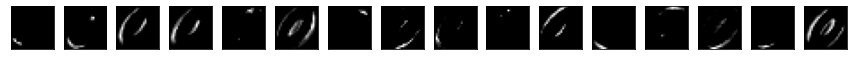

Dígito  1


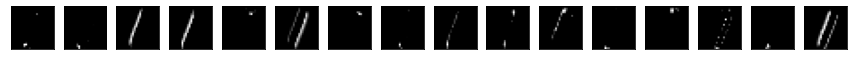

Dígito  2


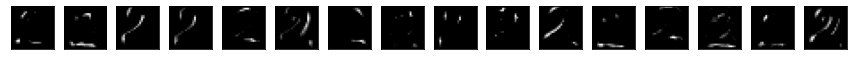

Dígito  3


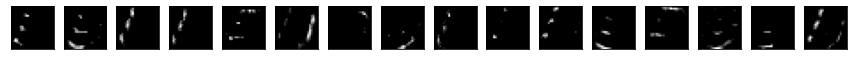

Dígito  4


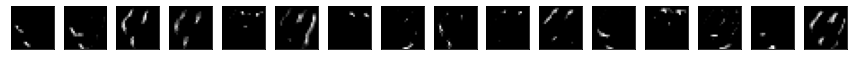

Dígito  5


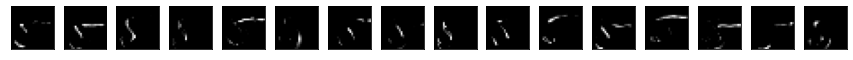

Dígito  6


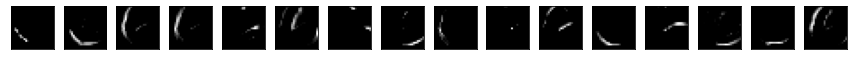

Dígito  7


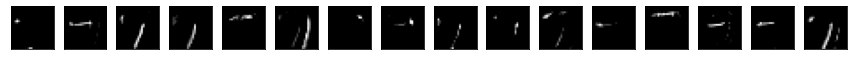

Dígito  8


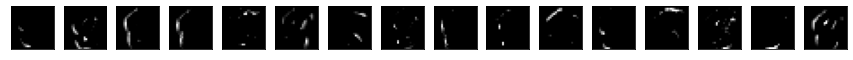

Dígito  9


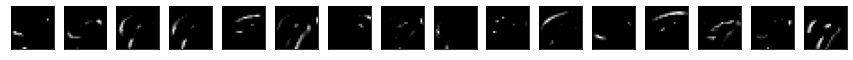

In [435]:
network = Model(inputs = network_4.inputs,                                      # Obtiene datos de la primera capa del modelo convolucional
                              outputs = network_4.layers[0].output)
network.summary()

maps = network.predict(number_images)
square = 16                                                                      # Define filas de 8 columnas de impresión en plt.show
ix = 1
number = ['0', '1', '2', '3', '4', '5', '6', '7', '8','9']
for n in range(len(number_images)):                                             # Ejecuta el plt show para todas las letras
  plt.figure(figsize=(15, 15) )
  for i in range(4):
    for i in range(4):
      ax = plt.subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(maps[n, :, :, ix-1], cmap='gray')
      ix += 1
  print('Dígito ', number[n])
  plt.show()
  ix = 1 

#####**Red C. CNN de una capa de procesado con un total de 24 núcleos de convolución**

Utilizando los datos que se manipularon previamente para cumplir con las disposisiones del enunciado, y la función que modela y compila la red neuronal convonucional de una capa, se crea la primera red solicitada, la cual cuenta con 24 núcleos de convolución en su primera capa de procesado, y además, según se dispuso en el modelo, la red adjunta tiene una capa oculta de 150 neuronas. La red se entrenará durante 15 iteraciones para después ser evaluada con el set de datos de validación. 

In [436]:
network_5 = convolutional_model (24, 26)                                        # Modela y compila red, con 16 kernels y 26 clases

network_5.fit(train_x, train_y, epochs = 15, verbose = 2)                       # Entrena la red

val_loss, val_accuracy = network_5.evaluate(test_x, test_y)                     # Valida la red con los datos de test

Epoch 1/15
82/82 - 2s - loss: 2.2771 - accuracy: 0.4408
Epoch 2/15
82/82 - 1s - loss: 0.7173 - accuracy: 0.7662
Epoch 3/15
82/82 - 1s - loss: 0.4268 - accuracy: 0.8562
Epoch 4/15
82/82 - 1s - loss: 0.2882 - accuracy: 0.9046
Epoch 5/15
82/82 - 1s - loss: 0.2038 - accuracy: 0.9273
Epoch 6/15
82/82 - 1s - loss: 0.2079 - accuracy: 0.9250
Epoch 7/15
82/82 - 1s - loss: 0.1254 - accuracy: 0.9550
Epoch 8/15
82/82 - 1s - loss: 0.1063 - accuracy: 0.9615
Epoch 9/15
82/82 - 1s - loss: 0.1149 - accuracy: 0.9596
Epoch 10/15
82/82 - 1s - loss: 0.1353 - accuracy: 0.9538
Epoch 11/15
82/82 - 1s - loss: 0.1344 - accuracy: 0.9496
Epoch 12/15
82/82 - 1s - loss: 0.1298 - accuracy: 0.9608
Epoch 13/15
82/82 - 1s - loss: 0.1252 - accuracy: 0.9596
Epoch 14/15
82/82 - 1s - loss: 0.1032 - accuracy: 0.9627
Epoch 15/15
82/82 - 1s - loss: 0.0768 - accuracy: 0.9735
49/49 [==============================] - 0s 6ms/step - loss: 1.3908 - accuracy: 0.7782


Una vez se corre el entrenamiento y validación de la red se despliegan las funciones de cada uno de los núcleos de convolución:

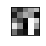

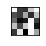

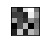

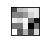

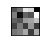

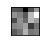

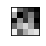

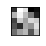

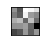

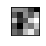

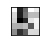

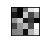

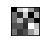

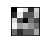

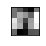

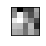

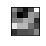

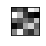

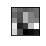

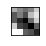

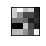

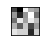

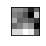

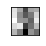

In [437]:
filters, biases = network_5.layers[0].get_weights()
filter_min, filter_max = filters.min(), filters.max()
filters = (filters - filter_min) / (filter_max - filter_min)

filter_number, ix = 24, 1                                                        # Establece el # de filtros
for i in range(filter_number):
  plt.figure(figsize=(15, 15) )
  f = filters[:, :, :, i]
  for j in range(1):
    ax = plt.subplot(filter_number, 2, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray')
    ix += 1
  plt.show()
  ix = 1

Ahora se muestran los mapas de activación para cada letra:


Model: "model_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 24)        624       
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________
Letra  a


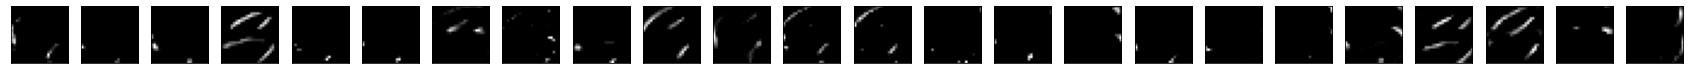

Letra  b


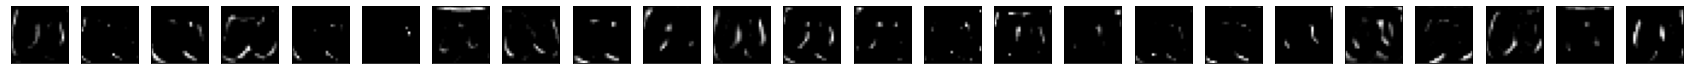

Letra  c


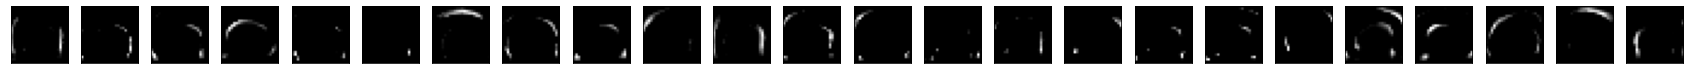

Letra  d


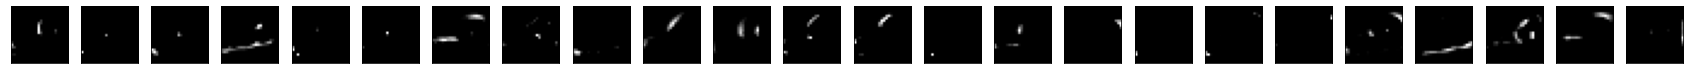

Letra  e


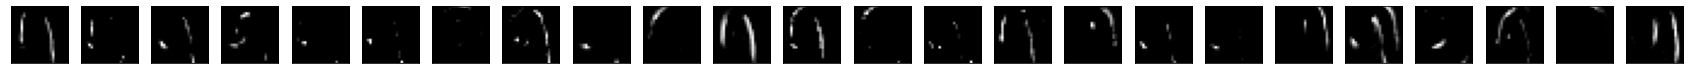

Letra  f


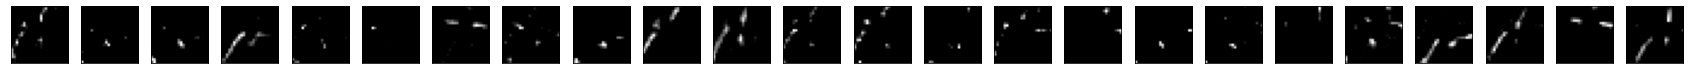

Letra  g


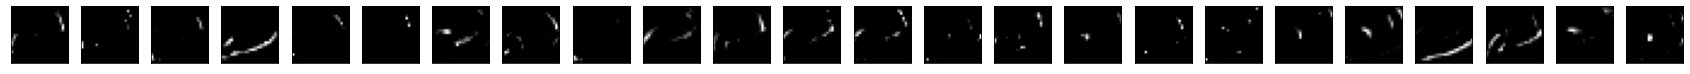

Letra  h


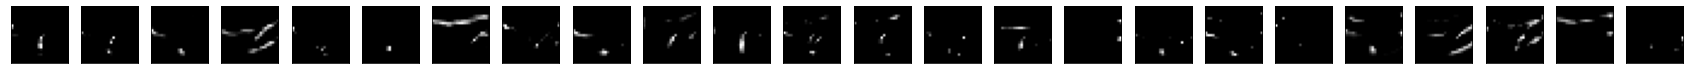

Letra  i


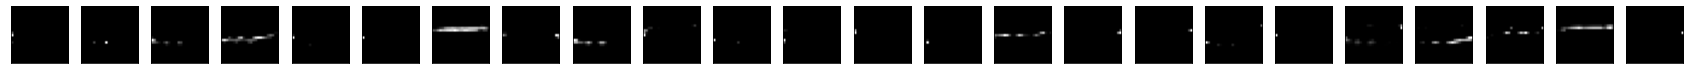

Letra  j


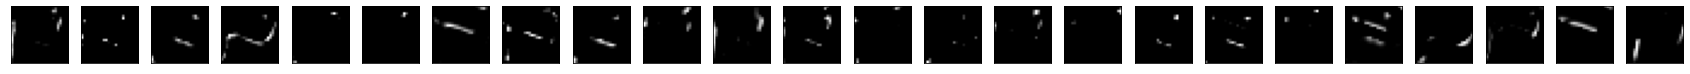

Letra  k


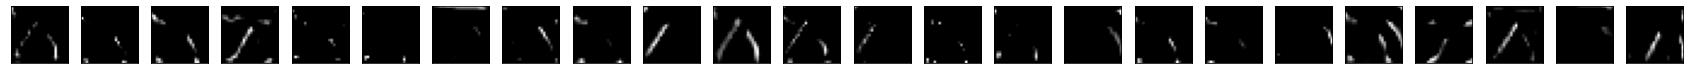

Letra  l


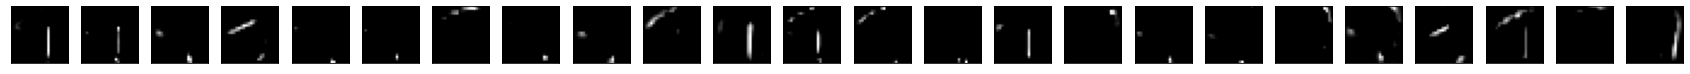

Letra  m


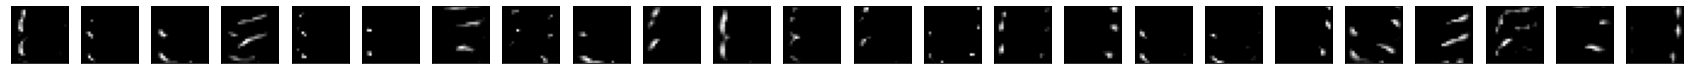

Letra  n


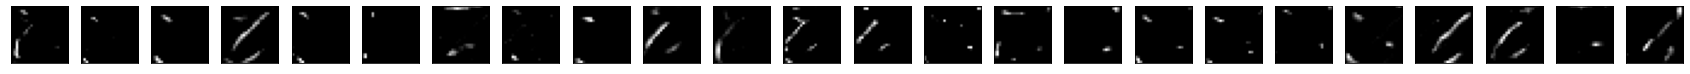

Letra  o


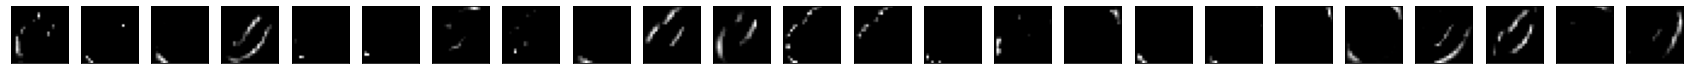

Letra  p


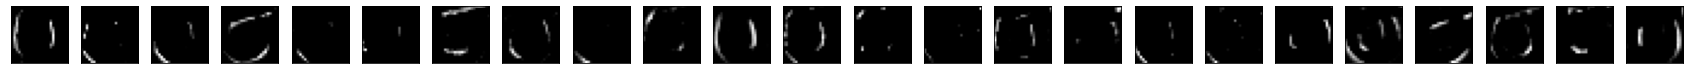

Letra  q


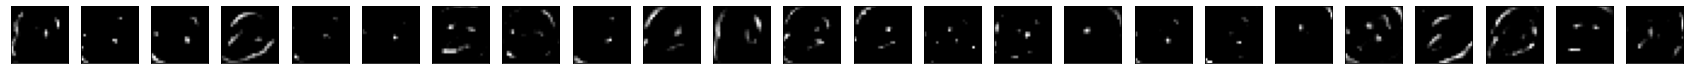

Letra  r


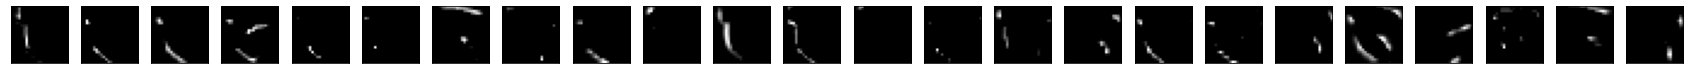

Letra  s


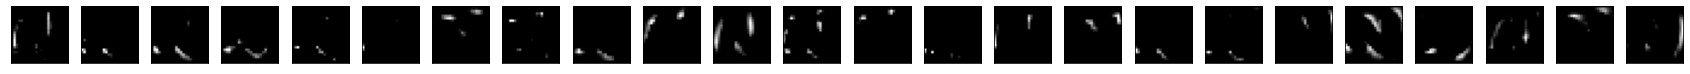

Letra  t


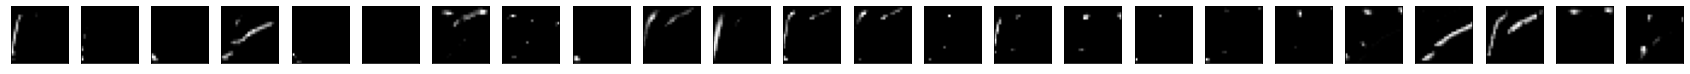

Letra  u


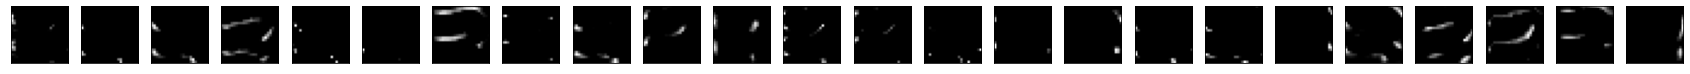

Letra  v


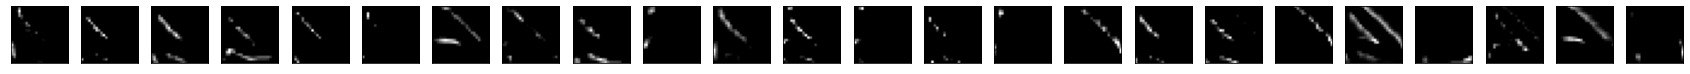

Letra  w


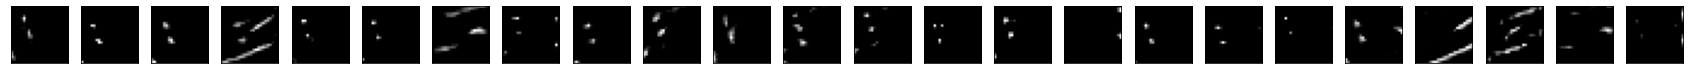

Letra  x


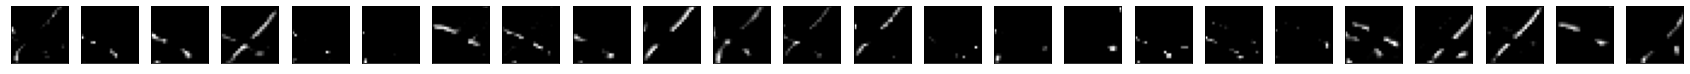

Letra  y


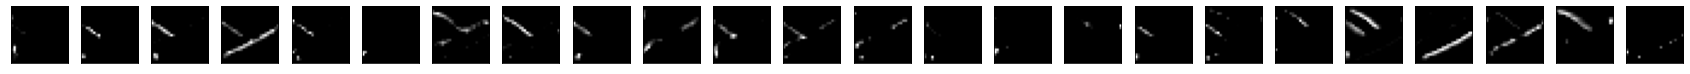

Letra  z


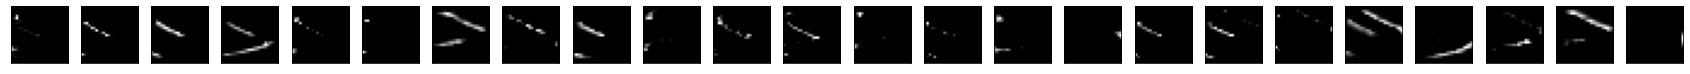

In [438]:
network = Model(inputs = network_5.inputs,                                      # Obtiene datos de la primera capa del modelo convolucional
                              outputs = network_5.layers[0].output)
network.summary()

maps = network.predict(letter_images)
square = 24                                                                      # Define filas de 8 columnas de impresión en plt.show
ix = 1
letter = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i','j', 'k', 'l', 'm', 'n',
          'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

n = 0
for n in range(len(letter_images)):                                             # Ejecuta el plt show para todas las letras
  plt.figure(figsize=(30, 30) )
  for i in range(8):
    for i in range(3):
      ax = plt.subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(maps[n, :, :, ix-1], cmap='gray')
      ix += 1
  print('Letra ', letter[n])
  plt.show()
  ix = 1 

Ahora, este mimo modelo de red se prueba con el set de dígitos:

In [439]:
network_6 = convolutional_model (24, 10)                                        # Modela y compila red, con 16 kernels y 26 clases

network_6.fit(train_x_n, train_y_n, epochs = 15, verbose = 2)                   # Entrena la red

val_loss, val_accuracy = network_6.evaluate(test_x_n, test_y_n)                 # Valida la red con los datos de test

Epoch 1/15
79/79 - 2s - loss: 1.1117 - accuracy: 0.7728
Epoch 2/15
79/79 - 1s - loss: 0.1560 - accuracy: 0.9484
Epoch 3/15
79/79 - 1s - loss: 0.0736 - accuracy: 0.9808
Epoch 4/15
79/79 - 1s - loss: 0.0843 - accuracy: 0.9716
Epoch 5/15
79/79 - 1s - loss: 0.0232 - accuracy: 0.9920
Epoch 6/15
79/79 - 1s - loss: 0.0276 - accuracy: 0.9928
Epoch 7/15
79/79 - 1s - loss: 0.0127 - accuracy: 0.9960
Epoch 8/15
79/79 - 1s - loss: 0.0333 - accuracy: 0.9876
Epoch 9/15
79/79 - 1s - loss: 0.0387 - accuracy: 0.9884
Epoch 10/15
79/79 - 1s - loss: 0.0565 - accuracy: 0.9844
Epoch 11/15
79/79 - 1s - loss: 0.0370 - accuracy: 0.9892
Epoch 12/15
79/79 - 1s - loss: 0.0542 - accuracy: 0.9844
Epoch 13/15
79/79 - 1s - loss: 0.0358 - accuracy: 0.9892
Epoch 14/15
79/79 - 1s - loss: 0.0455 - accuracy: 0.9880
Epoch 15/15
79/79 - 1s - loss: 0.0432 - accuracy: 0.9904
79/79 [==============================] - 1s 6ms/step - loss: 0.2477 - accuracy: 0.9532


Ahora se muestran los mapas de activación para cada número:

Model: "model_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 24, 24, 24)        624       
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________
Dígito  0


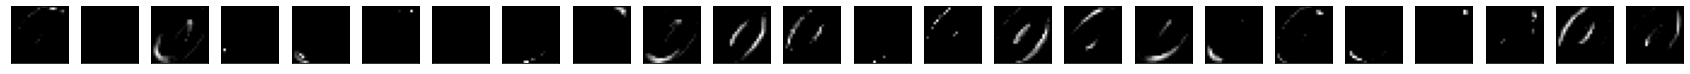

Dígito  1


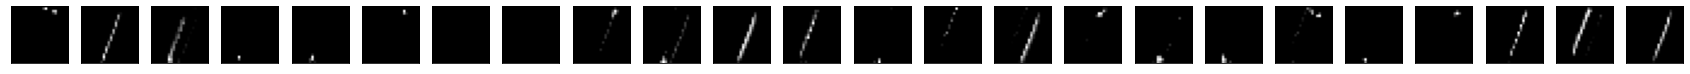

Dígito  2


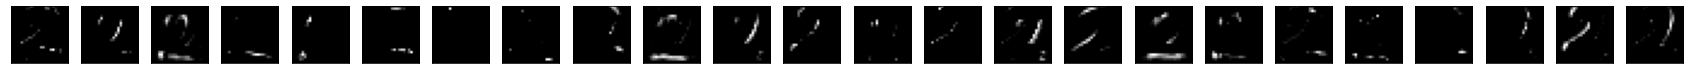

Dígito  3


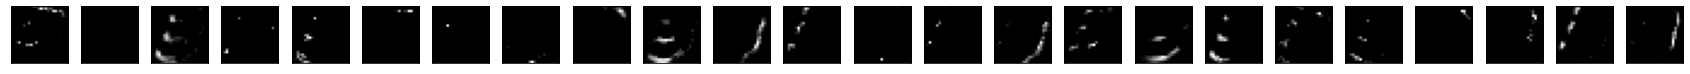

Dígito  4


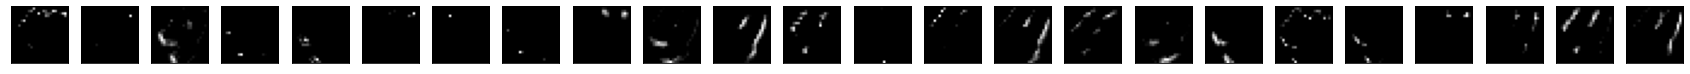

Dígito  5


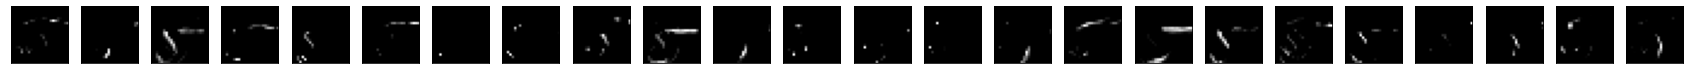

Dígito  6


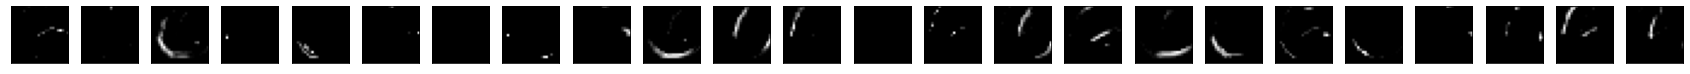

Dígito  7


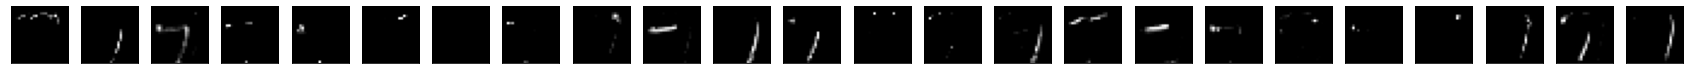

Dígito  8


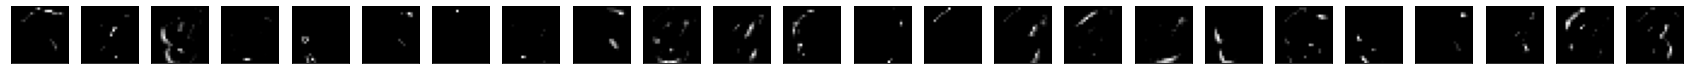

Dígito  9


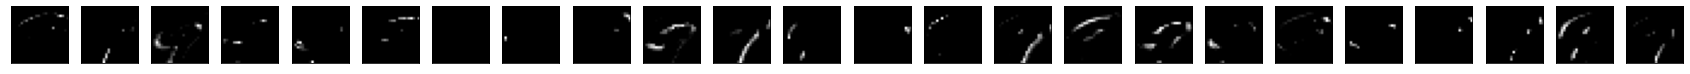

In [440]:
network = Model(inputs = network_6.inputs,                                      # Obtiene datos de la primera capa del modelo convolucional
                              outputs = network_6.layers[0].output)
network.summary()

maps = network.predict(number_images)
square = 24                                                                      # Define filas de 8 columnas de impresión en plt.show
ix = 1
number = ['0', '1', '2', '3', '4', '5', '6', '7', '8','9']
for n in range(len(number_images)):                                             # Ejecuta el plt show para todas las letras
  plt.figure(figsize=(30, 30) )
  for i in range(8):
    for i in range(3):
      ax = plt.subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(maps[n, :, :, ix-1], cmap='gray')
      ix += 1
  print('Dígito ', number[n])
  plt.show()
  ix = 1 

#####**Red D. Red MLP con las mejores características**

En vista de los resultados obtenidos, se obtiene que una red con una función de activación sigmoide presenta, para muchos casos, los mejores valores para loss y accuracy, esto también se confirma con los datos que se obtuvieron en la tarea 2, dado que esta red tiene 2600 datos de entrada y 26 de salida (2500 y 10 para el caso de los dígitos) se plantean dos capas ocultas de 150 neuronas cada una y una capa de salida de cantidad de neuronas variable, según sea la cantidad de labels. El learning rate se mantendrá en 0.01, ya que a lo largo del curso, en las múltiples redes este valor ha mostrado los mejores resultados. La capa de salida tendrá una función de activación softmax 

In [441]:
def mlp_model(classes):
  model = Sequential()
  model.add(Flatten())                                                          # Aplana datos
  model.add(Dense(150, activation='sigmoid'))                                   # Capa 'oculta'
  model.add(Dense(150, activation='sigmoid'))                                   # Capa 'oculta'
  model.add(Dense(classes, activation='softmax'))                               # Capa de salida de la red neuronal
  model.compile(loss='categorical_crossentropy',                                # Compilado de la red neuronal
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics='accuracy')
  return model

In [442]:
network_7 = mlp_model(26)                                                       # Red densa de 150 neuronas en sus dos capas ocultas
network_7.fit(x = train_x, y = train_y, epochs = 10) 
val_loss, val_accuracy = network_7.evaluate(test_x, test_y)                     # Valida la red con los datos de test

Epoch 1/10
82/82 [==============================] - 1s 3ms/step - loss: 2.3419 - accuracy: 0.3100
Epoch 2/10
82/82 [==============================] - 0s 3ms/step - loss: 1.1876 - accuracy: 0.6365
Epoch 3/10
82/82 [==============================] - 0s 3ms/step - loss: 0.8004 - accuracy: 0.7412
Epoch 4/10
82/82 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.7908
Epoch 5/10
82/82 [==============================] - 0s 3ms/step - loss: 0.4239 - accuracy: 0.8646
Epoch 6/10
82/82 [==============================] - 0s 3ms/step - loss: 0.3112 - accuracy: 0.9004
Epoch 7/10
82/82 [==============================] - 0s 3ms/step - loss: 0.2693 - accuracy: 0.9112
Epoch 8/10
82/82 [==============================] - 0s 3ms/step - loss: 0.1873 - accuracy: 0.9400
Epoch 9/10
82/82 [==============================] - 0s 3ms/step - loss: 0.1310 - accuracy: 0.9573
Epoch 10/10
49/49 [==============================] - 0s 2ms/step - loss: 1.1001 - accuracy: 0.7353


In [443]:
network_8 = mlp_model(10)                                                       # Red densa de 150 neuronas en sus dos capas ocultas
network_8.fit(x = train_x_n, y = train_y_n, epochs = 10) 
val_loss, val_accuracy = network_7.evaluate(test_x, test_y)                     # Valida la red con los datos de test

Epoch 1/10
79/79 [==============================] - 1s 3ms/step - loss: 1.0293 - accuracy: 0.6508
Epoch 2/10
79/79 [==============================] - 0s 3ms/step - loss: 0.3648 - accuracy: 0.8876
Epoch 3/10
79/79 [==============================] - 0s 4ms/step - loss: 0.1966 - accuracy: 0.9420
Epoch 4/10
79/79 [==============================] - 0s 3ms/step - loss: 0.1204 - accuracy: 0.9640
Epoch 5/10
79/79 [==============================] - 0s 3ms/step - loss: 0.0688 - accuracy: 0.9808
Epoch 6/10
79/79 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9876
Epoch 7/10
79/79 [==============================] - 0s 3ms/step - loss: 0.0472 - accuracy: 0.9856
Epoch 8/10
79/79 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9928
Epoch 9/10
79/79 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9968
Epoch 10/10
49/49 [==============================] - 0s 2ms/step - loss: 1.1001 - accuracy: 0.7353


### **Análisis de resultados**

#####**Comparación de las redes**

Para comparar el desempeño de las redes, se utilizará el validation loss y accuracy de cada una de ellas, con los datos de letras en primera instancia, que constituyen 100 ejemplos de cada letra como entrenamiento y 60 ejemplos de cada letra para validación y además se mostrará de segundo, el valor de loss y accuracy para las redes, ya que aquí se utilizaron 250 datos de cada número para entrenar, y se validó con 100

Para la red A, con 8 kernels:

In [444]:
val_loss, val_accuracy = network_1.evaluate(test_x, test_y)

49/49 [==============================] - 0s 6ms/step - loss: 1.4080 - accuracy: 0.7724


In [445]:
val_loss, val_accuracy = network_2.evaluate(test_x_n, test_y_n)

79/79 [==============================] - 0s 6ms/step - loss: 0.3046 - accuracy: 0.9500


Para la red B, con 16 kernels:

In [446]:
val_loss, val_accuracy = network_3.evaluate(test_x, test_y)

49/49 [==============================] - 0s 5ms/step - loss: 1.3177 - accuracy: 0.7635


In [447]:
val_loss, val_accuracy = network_4.evaluate(test_x_n, test_y_n)

79/79 [==============================] - 0s 6ms/step - loss: 0.2618 - accuracy: 0.9528


Para la red C, con 24 kernels:

In [448]:
val_loss, val_accuracy = network_5.evaluate(test_x, test_y)

49/49 [==============================] - 0s 6ms/step - loss: 1.3908 - accuracy: 0.7782


In [449]:
val_loss, val_accuracy = network_6.evaluate(test_x_n, test_y_n)

79/79 [==============================] - 1s 6ms/step - loss: 0.2477 - accuracy: 0.9532


Para la red D, con 2 capas ocultas de 150 neuronas:

In [450]:
val_loss, val_accuracy = network_7.evaluate(test_x, test_y)

49/49 [==============================] - 0s 2ms/step - loss: 1.1001 - accuracy: 0.7353


In [451]:
val_loss, val_accuracy = network_8.evaluate(test_x_n, test_y_n)

79/79 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.9268


Dados loos resultados de validación obtenidos, pdemos decir que el desempeño de las redes convolucionales es mucho mejor al de la red densa siempre que se tenga una cantidad significativa de daatos de entrenamiento para cada uno de los labels, es por esto que en el caso del set de letras el desempeño es ligeramente mejor en la red densa, mientras que el desempeño del set de números es mejor en las redes convolucionales.
En base a los resultados se puede decir que, de las 4 redes, la de mejor desempeño es la red de 24 núcleos de convolución.
Cabe resaltar que para estas comparaciones, todos los hiperparámetros de la red se mantuvieron iguales y solo cambió la cantidad de núcleos, sin embargo, cambiar el pooling, learning rate, tamaño de la matriz de convolución entre otros puede también afectar la calidad de la red convolucional. En este caso, como se indicó, la red de 24 núcleos es de mejor calidad y esto puede deberse a la capacidad de la red de detectar un mayor número de características en la imagen cargada al tener mayor cantidad de núcleos.

####**Análisis de función de cada kernel**

Para evitar una gran cantidad de datos desplegados, este análisis se hará en la red de 8 kernels. A continuación se muestra el resultado del mapa de activación para la letra X y el número cero (0) de manera que se pueda comparar el funcionamiento de cada kernel.

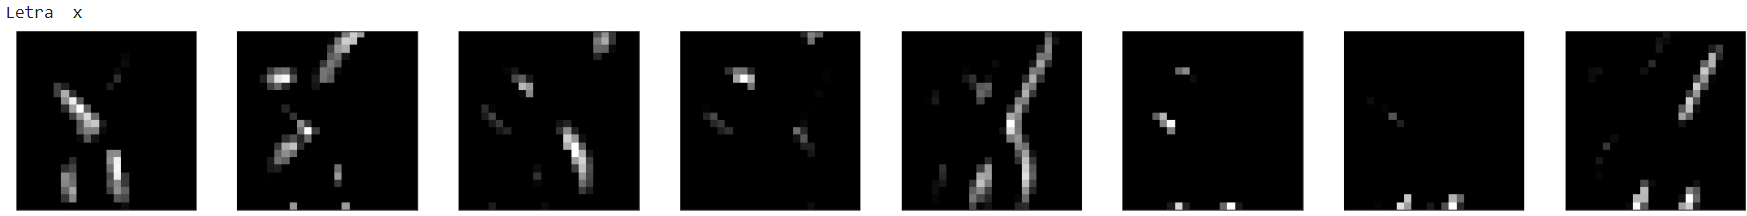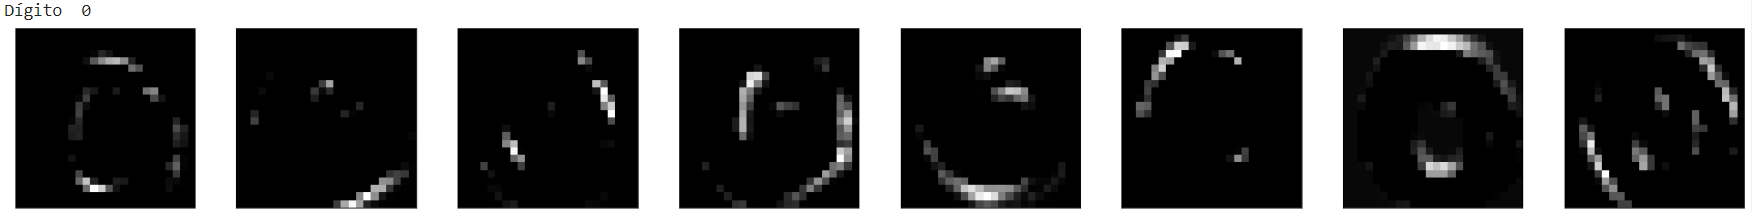

De izquierda a derecha, se enumeran los kernels de 1 a 8. En casos particulares, el kernel **número 5** parese resaltar el borde inferuior de los trazos, lo cual lo confirma el cero, donde este solo resalta en los puntos donde este borde inferior existe. Por su parte el kernel **número 7** parece no resaltar ninguna geometría en particular, aunque si se observa el cero, se resaltan lineas horizontales. Los kernel **número 8 y 2** parecen resaltar el contorno completo, por abos lados de la imágen lo cual se contempla también en el dígito cero. Para el caso del kernel **número 1 y 3** parece resaltar inclinaciones de manera que estas se asemjen a una función lineal decreciente sin embargo, las líneas 'verticales' también parecen resaltarse en el kernel **número 1**. Por último el kerfnel **número 4** también parece resaltar lineas verticales y el kernel **número 6** parece resaltar la esquina superior izquierd de la imagen. Todos este análisis puede comprobarse consultando, en la sección Red A de la sección Redes neuronales convolucionales, dónde se encntrará todas las funciones de kernels aplicados a cada una de las figuras.

#####**Implicaciones de tener un mayor número de kernels**

El aumentar la cantidad de kernels, implica que haya una mayor cantidad de filtros convolucionales por los cuales pasará la imagen, estos filtros se especializan en resaltar cualidades de la imágen, por ejemplo líneas horizontales y verticales, por lo que tener un mayor número de filtros permite mejorar la calidad del filtrado, y también de evitar los errores de filtrado, también, a mayor cantidad de filtros, mayor cantidad de caraterísticas de una imágen será capaz de reconocer la red, por lo que será capaz de procesaer imágenes cada vez más complejas.

#####**Principio básico de funcoionamiento de los kernels**

La función básica que realiza un kernel es una convolución, los kernel son matrices cuadradas, de tamaño menor al de las imágenes los cuales se convolucionan con la imágen por análizar y dependiendo de los valores del kernel, resaltan alguna caraterística de la imágen.

#####**Pregunta sobre imágenes biomédicas**

Afirmación:

*...El uso de redes
convolucionales para clasificación de imágenes biomédicas debe usarse siempre
cómo un método de preclasificación (para un posterior análisis por parte de un especialista) y nunca como un método totalmente automatizado de diagnóstico “incluso aunque la tasa de aciertos de la red sobre un conjunto de ejemplos de prueba
muy elevado fuera muy superior a la tasa de aciertos de un especialista humano”*

Esto, desde una perspectiva probabilística no tiene un sentido lógico, sin embargo, es importante considerar que las redes convolucionales no son perfectas, en la ejecución de la red se puede observar que en todo momento hay un loss presente, y el test accuracy nunca es cero. Esto en situaciones como el reconocimiento de caracteres no es un problema grave, sin embargo, cuando la vida de una persona está en riesgo, ya sea por un falso positivo o un falso negativo, se convierte en una situación completamente opuesta, donde este error puede llegar a ser letal para el paciente. La red puede utilizarse como un pre-filtro sin problema alguno, como una ayuda al profesional en el área, sin embargo, siempre debe considerarse la posibilidad de falsos negativos y falsos positivos. Además, el dar un diagnóstico conlleva implicaciones éticas, morales y legales, las cuales no puede asumir la computadora que realiza el proceso por lo que esta, como menciona la afirmación, **NUNCA** debe dar el diagnóstico final.